<div align="center"> 

---

# **Manuscript Figures**

</div>

----

<div align="center"> 


</div>

---
# <u> **Description:**</u>

Visualization for manuscript figures.

---

### **General settings options**

In [1]:
addTaskCallback(function(...) {set.seed(42);TRUE})
options(warn=-1) # to turn off warnings
#options(warn=0) # to turn on warnings
options(repr.plot.width=16, repr.plot.height=14) # to resize plots

1 
1

In [2]:
# Make sure to install pacman before we begin
  if (!require("pacman")) {
  install.packages("pacman")
  }

# Load required packages  
  pacman::p_load(tidyverse,devtools,ggpubr,ggthemes,png,grid,gridExtra,janitor,patchwork)


Loading required package: pacman



#### Load Data

In [3]:
setwd("../")

In [4]:
load("Data/Alcohol_consumption.RData")

In [5]:
load("Data/Behavior_metricsEPM.RData")

In [6]:
load("Data/Behavior_metricsNOR.RData")

In [7]:
load("Data/Behavior_metricsCPP.RData")

In [8]:
load("Data/MRI_metrics.RData")

In [ ]:
RID_group <- read_csv("Data/RID.csv")
Class_group <- read_csv("Data/Class.csv")

In [8]:
Alcohol_intake %>% select(c(RID,Sex,Group,Batch)) %>% unique()

RID,Sex,Group,Batch
<dbl>,<fct>,<chr>,<dbl>
1,female,Alc,1
2,female,Alc,1
4,female,Alc,1
6,female,Alc,1
7,female,Alc,1
8,female,Alc,1
9,male,Alc,1
12,male,Alc,1
13,male,Alc,1


In [10]:
RID_class <- RID_group %>% left_join(Class_group[-3], by ="RID") %>% mutate(Intake = case_when(class == "Low" ~ class, 
                                                                            class == "High" ~ class, Group == "Ctrl" ~ "Ctrl",
                                                                            Group == "Ctrl+Ctrl" ~ "Ctrl")) %>% select(-c("class"))
RID_class %>% write_csv("Data/RID_Group_class.csv")

### **Figure for Design**

In [10]:
# Read png files
Design <- readPNG("Figures/Design/ModelDesign_IA2BC.png")


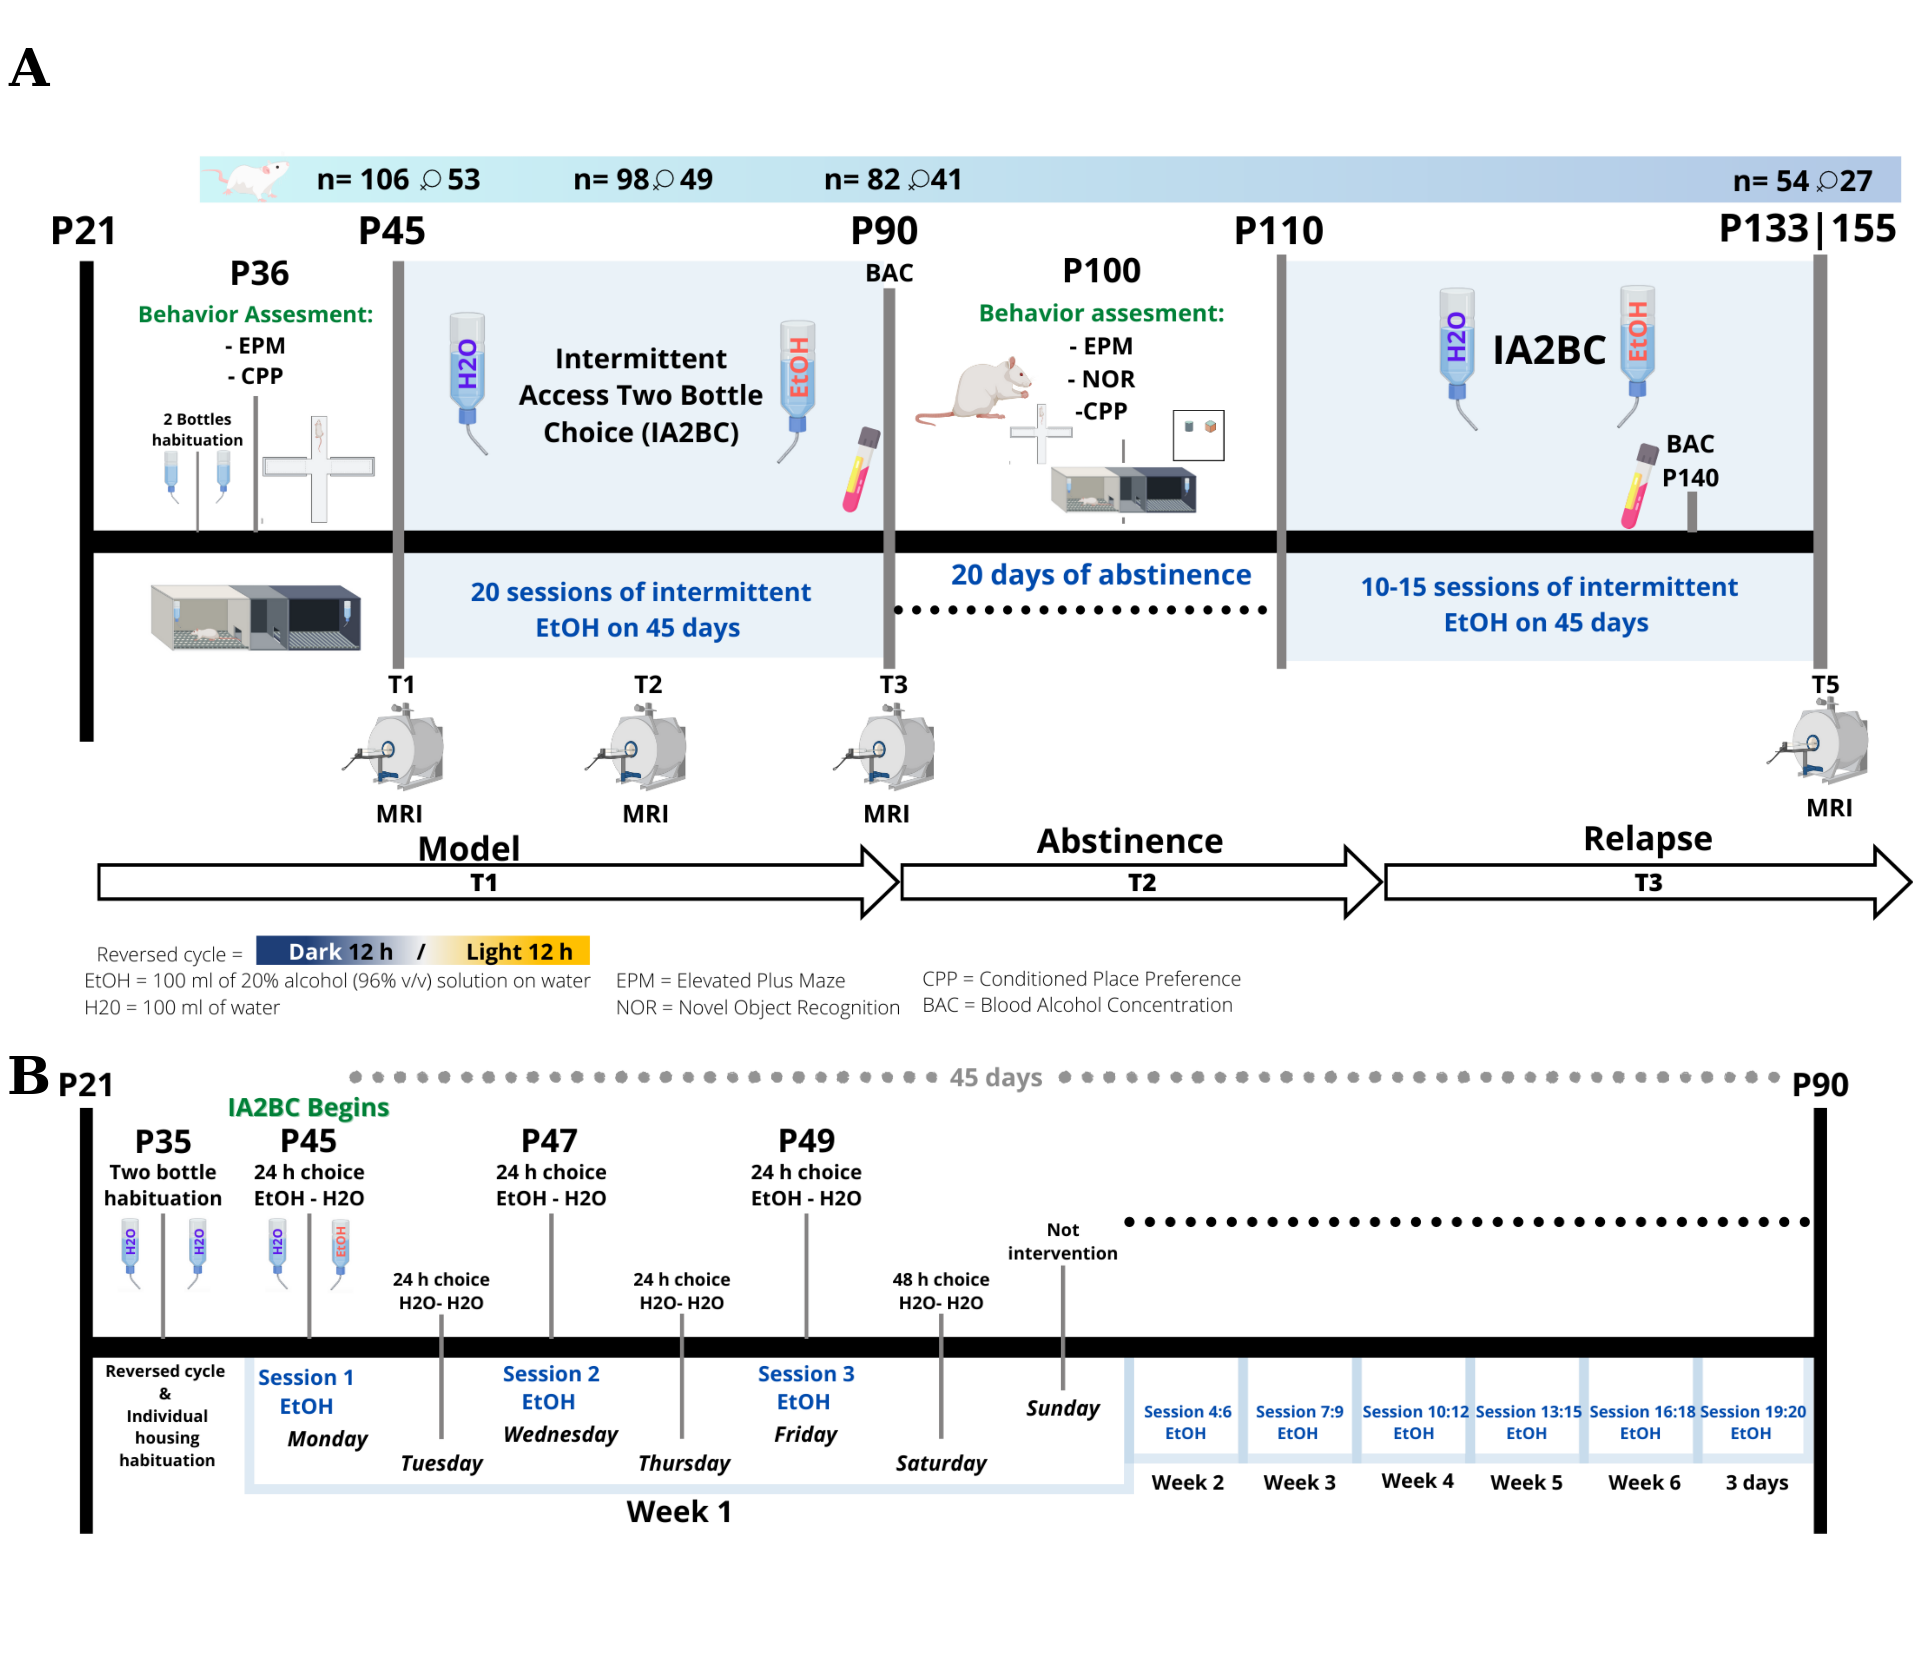

In [11]:
Fig.Design <- ggarrange(rasterGrob(Design)) +
    annotate(geom = "text", x = 0.015, y = 0.96,label = "A", size = 11, fontface = 2, family = "Times New Roman") +
    annotate(geom = "text", x = 0.015, y = 0.36,label = "B", size = 11, fontface = 2, family = "Times New Roman")
Fig.Design

### **Figure for Model results**

In [ ]:
# Read png files
Poly1 <- readPNG("Figures/Results_Models/Poly_1.png")
Poly2 <- readPNG("Figures/Results_Models/Poly_2.png")

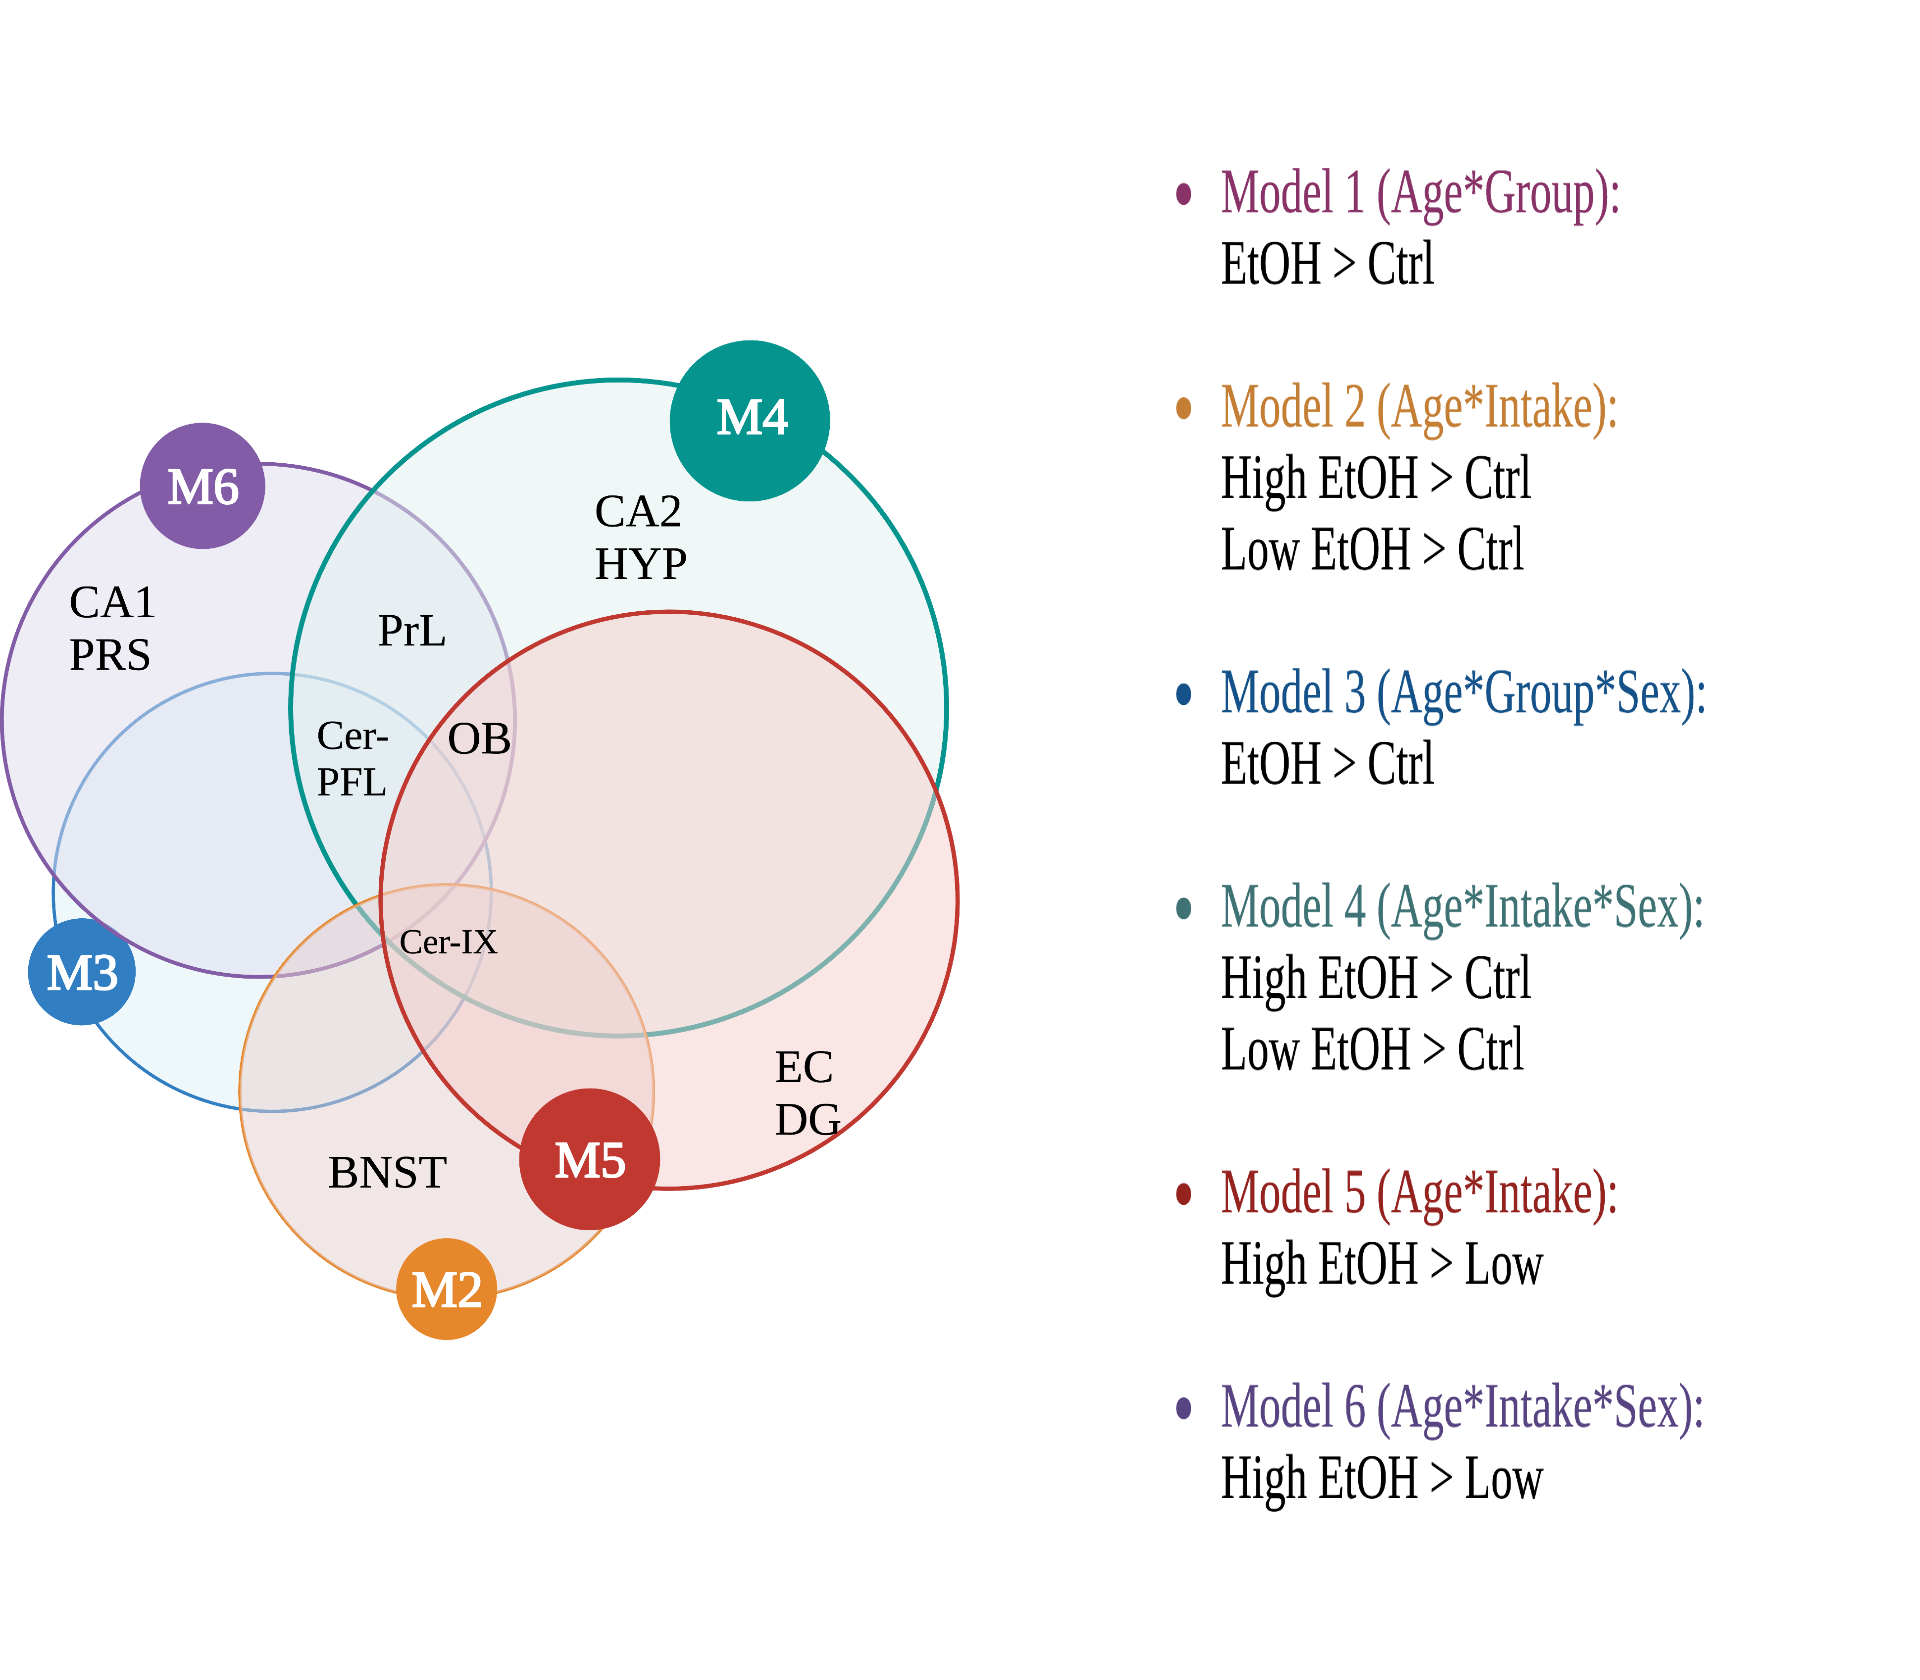

In [14]:
Fig.poly <- ggarrange(rasterGrob(Poly1),rasterGrob(Poly2,width = 0.55, height = 0.8))
Fig.poly

### **Figure for Alcohol consumption**

In [11]:
data_ends <- rbind.data.frame(Alcohol_classd,Alcohol_classd %>% mutate(class = case_when(class == "Low" ~ "All", class == "High" ~ "All")) ) %>% 
    filter(Phase == "Relapse", Session == 15) %>% 
    group_by(class,Session) %>% summarise(main_intake = mean(main_intake, na.rm = T)) %>% pull(main_intake) %>% round(3)

`summarise()` has grouped output by 'class'. You can override using the `.groups` argument.


In [12]:
sddata_ends <- rbind.data.frame(Alcohol_classd,Alcohol_classd %>% mutate(class = case_when(class == "Low" ~ "All", class == "High" ~ "All")) ) %>% 
    filter(Phase == "Relapse", Session == 15) %>% 
    group_by(class,Session) %>% summarise(main_intake = sd(main_intake, na.rm = T)) %>% pull(main_intake) %>% round(3)

`summarise()` has grouped output by 'class'. You can override using the `.groups` argument.


In [13]:
plot_class.Model <- rbind.data.frame(Alcohol_classd,Alcohol_classd %>% 
    mutate(class = case_when(class == "Low" ~ "All", class == "High" ~ "All")) ) %>% 
    mutate(class = case_when(class == "High" ~ paste0("High (", prob_model[1][[1]][2]," %, f = 7.93 %)  "), 
                             class == "Low" ~ paste0("Low (", prob_model[1][[1]][4], " %, f = 42 %) "), 
                             class == "All" ~ "All")) %>% filter(Phase == "Model") %>%
    ggline(x = "Session", y =  "main_intake", group = "class", point.size = 3,
           add = c("mean_se"), size=2, color = "class", palette = pal_group,
           legend.title = "Group", 
           ylab = "Ethanol main intake (g/kg/24 hrs)", xlab = "Sessions") +
    annotate("rect", xmin=c(0.47), xmax=c(20), ymin=c(11) , ymax=c(11.5), alpha=0.3, fill="#5C8A74") +
    annotate(geom = "text", x = 10, y = 11.25,label = "IA2BC phase", size = 5, fontface = 2) +
  theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
        #axis.text.x.bottom = element_text(margin = margin(b = 10)),
        axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
        legend.text = element_text(size=21, family = "Times New Roman")) + theme_settings 
plot_class.Model <- ggpar(plot_class.Model,ylim = c(0,11))

In [14]:
plot_class.Relapse <- rbind.data.frame(Alcohol_classd,Alcohol_classd %>% 
    mutate(class = case_when(class == "Low" ~ "All", class == "High" ~ "All")) ) %>% 
    mutate(class = case_when(class == "High" ~ paste0("High (", prob_model[1][[1]][2]," %, f = 7.93 %)  "), 
                             class == "Low" ~ paste0("Low (", prob_model[1][[1]][4], " %, f = 42 %) "), 
                             class == "All" ~ "All")) %>% filter(Phase == "Relapse") %>%
    ggline(x = "Session", y =  "main_intake", group = "class", point.size = 3,
           add = c("mean_se"), size=2, color = "class", palette = pal_group,
           legend.title = "Group", 
           ylab = "Ethanol main intake (g/kg/24 hrs)", xlab = "Sessions") + 
    annotate("rect", xmin=c(0.8), xmax=c(15), ymin=c(11) , ymax=c(11.5), alpha=0.3, fill="#668DB5") +
    annotate(geom = "text", x = 8, y = 11.25,label = "Relapse phase", size = 5, fontface = 2) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = data_ends)) +
    annotate(geom = "point", x = 15, y = 7.858, colour = "orange", size = 3) +
    annotate(geom = "point", x = 15, y = 4.363, colour = "orange", size = 3) +
    annotate(geom = "point", x = 15, y = 2.266, colour = "orange", size = 3) +
    theme(axis.title.y.left = element_blank(),axis.text.y.left = element_blank(),
          axis.text.x = element_text(margin = margin(c(t = .12,b=12), unit = "cm")),
          axis.line.y = element_blank(),axis.ticks.y = element_blank() ) + 
    theme_settings
plot_class.Relapse <- ggpar(plot_class.Relapse,ylim = c(0,11))

#### Binge

In [32]:
datab_ends <- rbind.data.frame(Alcohol_classd,Alcohol_classd %>% mutate(class = case_when(class == "Low" ~ "All", class == "High" ~ "All")) ) %>% 
    filter(Phase == "Relapse", Session == 15) %>% 
    group_by(class,Session) %>% summarise(Binge = mean(Binge, na.rm = T)) %>% pull(Binge) %>% round(3)
datab_ends

`summarise()` has grouped output by 'class'. You can override using the `.groups` argument.


[1] 0.461 0.739 0.184

In [33]:
plot_class.Binge <- rbind.data.frame(Alcohol_classd,Alcohol_classd %>% 
    mutate(class = case_when(class == "Low" ~ "All", class == "High" ~ "All")) ) %>% 
    mutate(class = case_when(class == "High" ~ paste0("High (", prob_model[1][[1]][2]," %)"), 
                             class == "Low" ~ paste0("Low (", prob_model[1][[1]][4], " %)"), 
                             class == "All" ~ "All")) %>% filter(Phase == "Model") %>%
    ggline(x = "Session", y =  "Binge", group = "class", point.size = 3,
           add = c("mean_se"), size=2, color = "class", palette = pal_group,
           legend.title = "Group", 
           ylab = "Binge intake (g/kg/30 min)", xlab = "Sessions")  +
    annotate("rect", xmin=c(0.47), xmax=c(20), ymin=c(2.95) , ymax=c(3.15), alpha=0.3, fill="#5C8A74") +
    annotate(geom = "text", x = 10, y = 3.05,label = "IA2BC phase", size = 5, fontface = 2) +
  theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
        legend.position = "none",
        #axis.text.x.bottom = element_text(margin = margin(b = 10)),
        axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
        legend.text = element_text(size=21, family = "Times New Roman")) + theme_settings
plot_class.Binge <- ggpar(plot_class.Binge,ylim = c(0,3.2))

In [34]:
plot_class.Binge.Relapse <- rbind.data.frame(Alcohol_classd,Alcohol_classd %>% 
    mutate(class = case_when(class == "Low" ~ "All", class == "High" ~ "All")) ) %>% 
    mutate(class = case_when(class == "High" ~ paste0("High (", prob_model[1][[1]][2]," %)"), 
                             class == "Low" ~ paste0("Low (", prob_model[1][[1]][4], " %)"), 
                             class == "All" ~ "All")) %>% filter(Phase == "Relapse") %>%
    ggline(x = "Session", y =  "Binge", group = "class", point.size = 3,
           add = c("mean_se"), size=2, color = "class", palette = pal_group,
           legend.title = "Group", 
           ylab = "Binge intake (g/kg/24 hrs)", xlab = "Sessions") + 
    annotate("rect", xmin=c(0.8), xmax=c(15), ymin=c(2.95) , ymax=c(3.15), alpha=0.3, fill="#668DB5") +
    annotate(geom = "text", x = 8, y = 3.05,label = "Relapse phase", size = 5, fontface = 2) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = datab_ends)) +
    annotate(geom = "point", x = 15, y = 0.461, colour = "orange", size = 3) +
    annotate(geom = "point", x = 15, y = 0.739, colour = "orange", size = 3) +
    annotate(geom = "point", x = 15, y = 0.184, colour = "orange", size = 3) +
    theme(axis.title.y.left = element_blank(),axis.text.y.left = element_blank(),
          legend.position = "none",
          axis.text.x = element_text(margin = margin(c(t = .12,b=12), unit = "cm")),
          axis.line.y = element_blank(),axis.ticks.y = element_blank() ) + 
    theme_settings
plot_class.Binge.Relapse <- ggpar(plot_class.Binge.Relapse,ylim = c(0,3.2))

#### ADE

In [17]:
plot_ADE <- ggline(ADE, x = "Session", y =  "ADE", group = "class",
              add = c("mean_se", "jitter"), point.size = 4, 
              size=2, color = "class", palette = pal_group[2:3],
              xlab = "Sessions", ylab = "ADE index") +
            theme(legend.position = "none",
              axis.text.y.left = element_text(margin = margin(l = 10)),
        axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")) ) + 
            theme_settings

In [18]:
BEC_female <- ggscatter(BEC %>% clean_names() %>% filter(sex == "Female"), x = 'g_kg_240min', y = 'bec_ng_ul',
    add = "reg.line", conf.int = TRUE, color = pal_sex[1], add.params = list(color = pal_sex[1], fill = "lightgray")) + stat_cor() +
    theme(axis.text.y.left = element_text(margin = margin(l = 10)),
          axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")) ) + xlab("g/kg/240 min") + ylab("BEC (ng/ul)") + theme_settings
BEC_male <- ggscatter(BEC %>% clean_names() %>% filter(sex == "Male"), x = 'g_kg_240min', y = 'bec_ng_ul',
    add = "reg.line", conf.int = TRUE, color = pal_sex[2], add.params = list(color = pal_sex[2], fill = "lightgray")) + stat_cor() + 
    theme(#axis.title.y = element_blank(),
          axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")) ) + xlab("g/kg/240 min") + ylab("BEC (ng/ul)") + theme_settings

In [19]:
leg <- get_legend(ggscatter(BEC %>% clean_names() %>% filter(sex == "Male"), x = 'g_kg_240min', y = 'bec_ng_ul',color = "sex",
                  add = "reg.line", conf.int = TRUE, palette = pal_sex[2], add.params = list(fill = "lightgray")) + 
                  theme_settings + theme(legend.text = element_text(size = 20)) )

#### Arranging plots

In [35]:
plot_clss <- ggarrange(plot_class.Model, plot_class.Relapse, ncol = 2, common.legend = T)

In [36]:
plot_clss.Binge <- ggarrange(plot_class.Binge, plot_class.Binge.Relapse, ncol = 2, common.legend = F)

In [37]:
plot_BEC1 <- ggarrange(BEC_female,BEC_male,widths = c(1,0.95)) + theme_settings
plot_BEC <- ggarrange(as_ggplot(leg),BEC_male,ncol = 1, heights = c(0.2,1.8))

In [38]:
Fig.Consumption1 <- ggarrange(plot_clss.Binge,plot_BEC, labels = c("B","C"), widths = c(1.5,0.5),
                              font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))

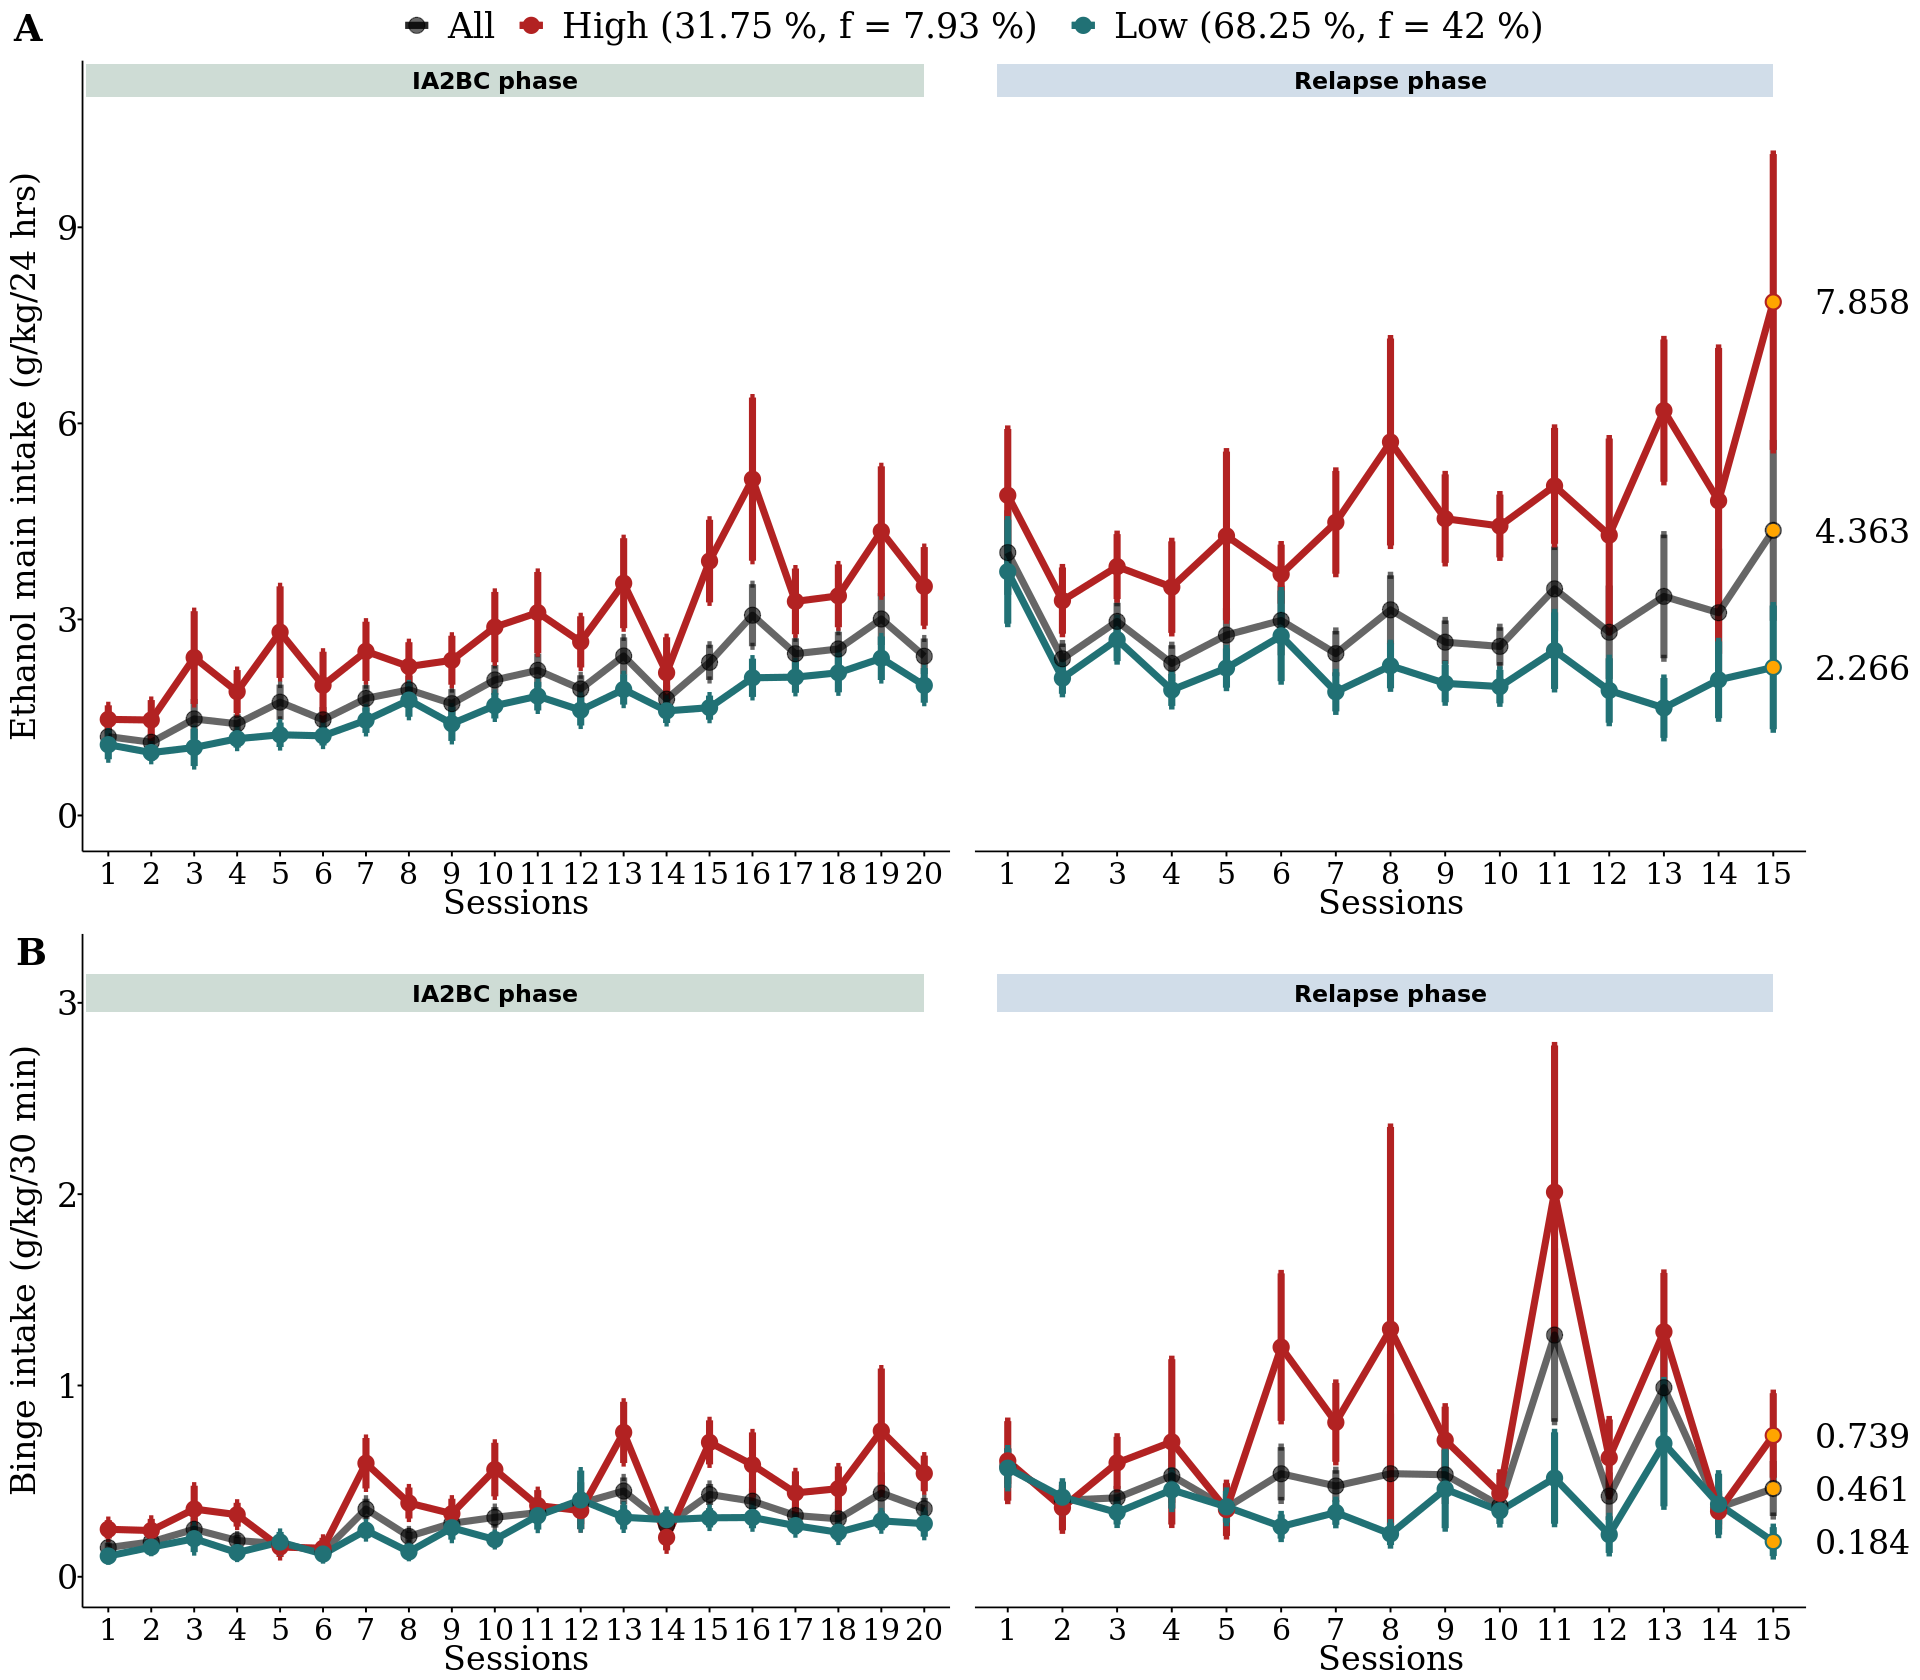

In [40]:
Fig.Consumption <- ggarrange(plot_clss, plot_clss.Binge, ncol = 1, labels = c("A","B"), heights = c(1.1,0.9),
                             font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))
Fig.Consumption

### **Figures of Behavior**

#### Deeplabcut labels

In [26]:
# Read png files
img <- readPNG("Figures/DLC/Labels.png")

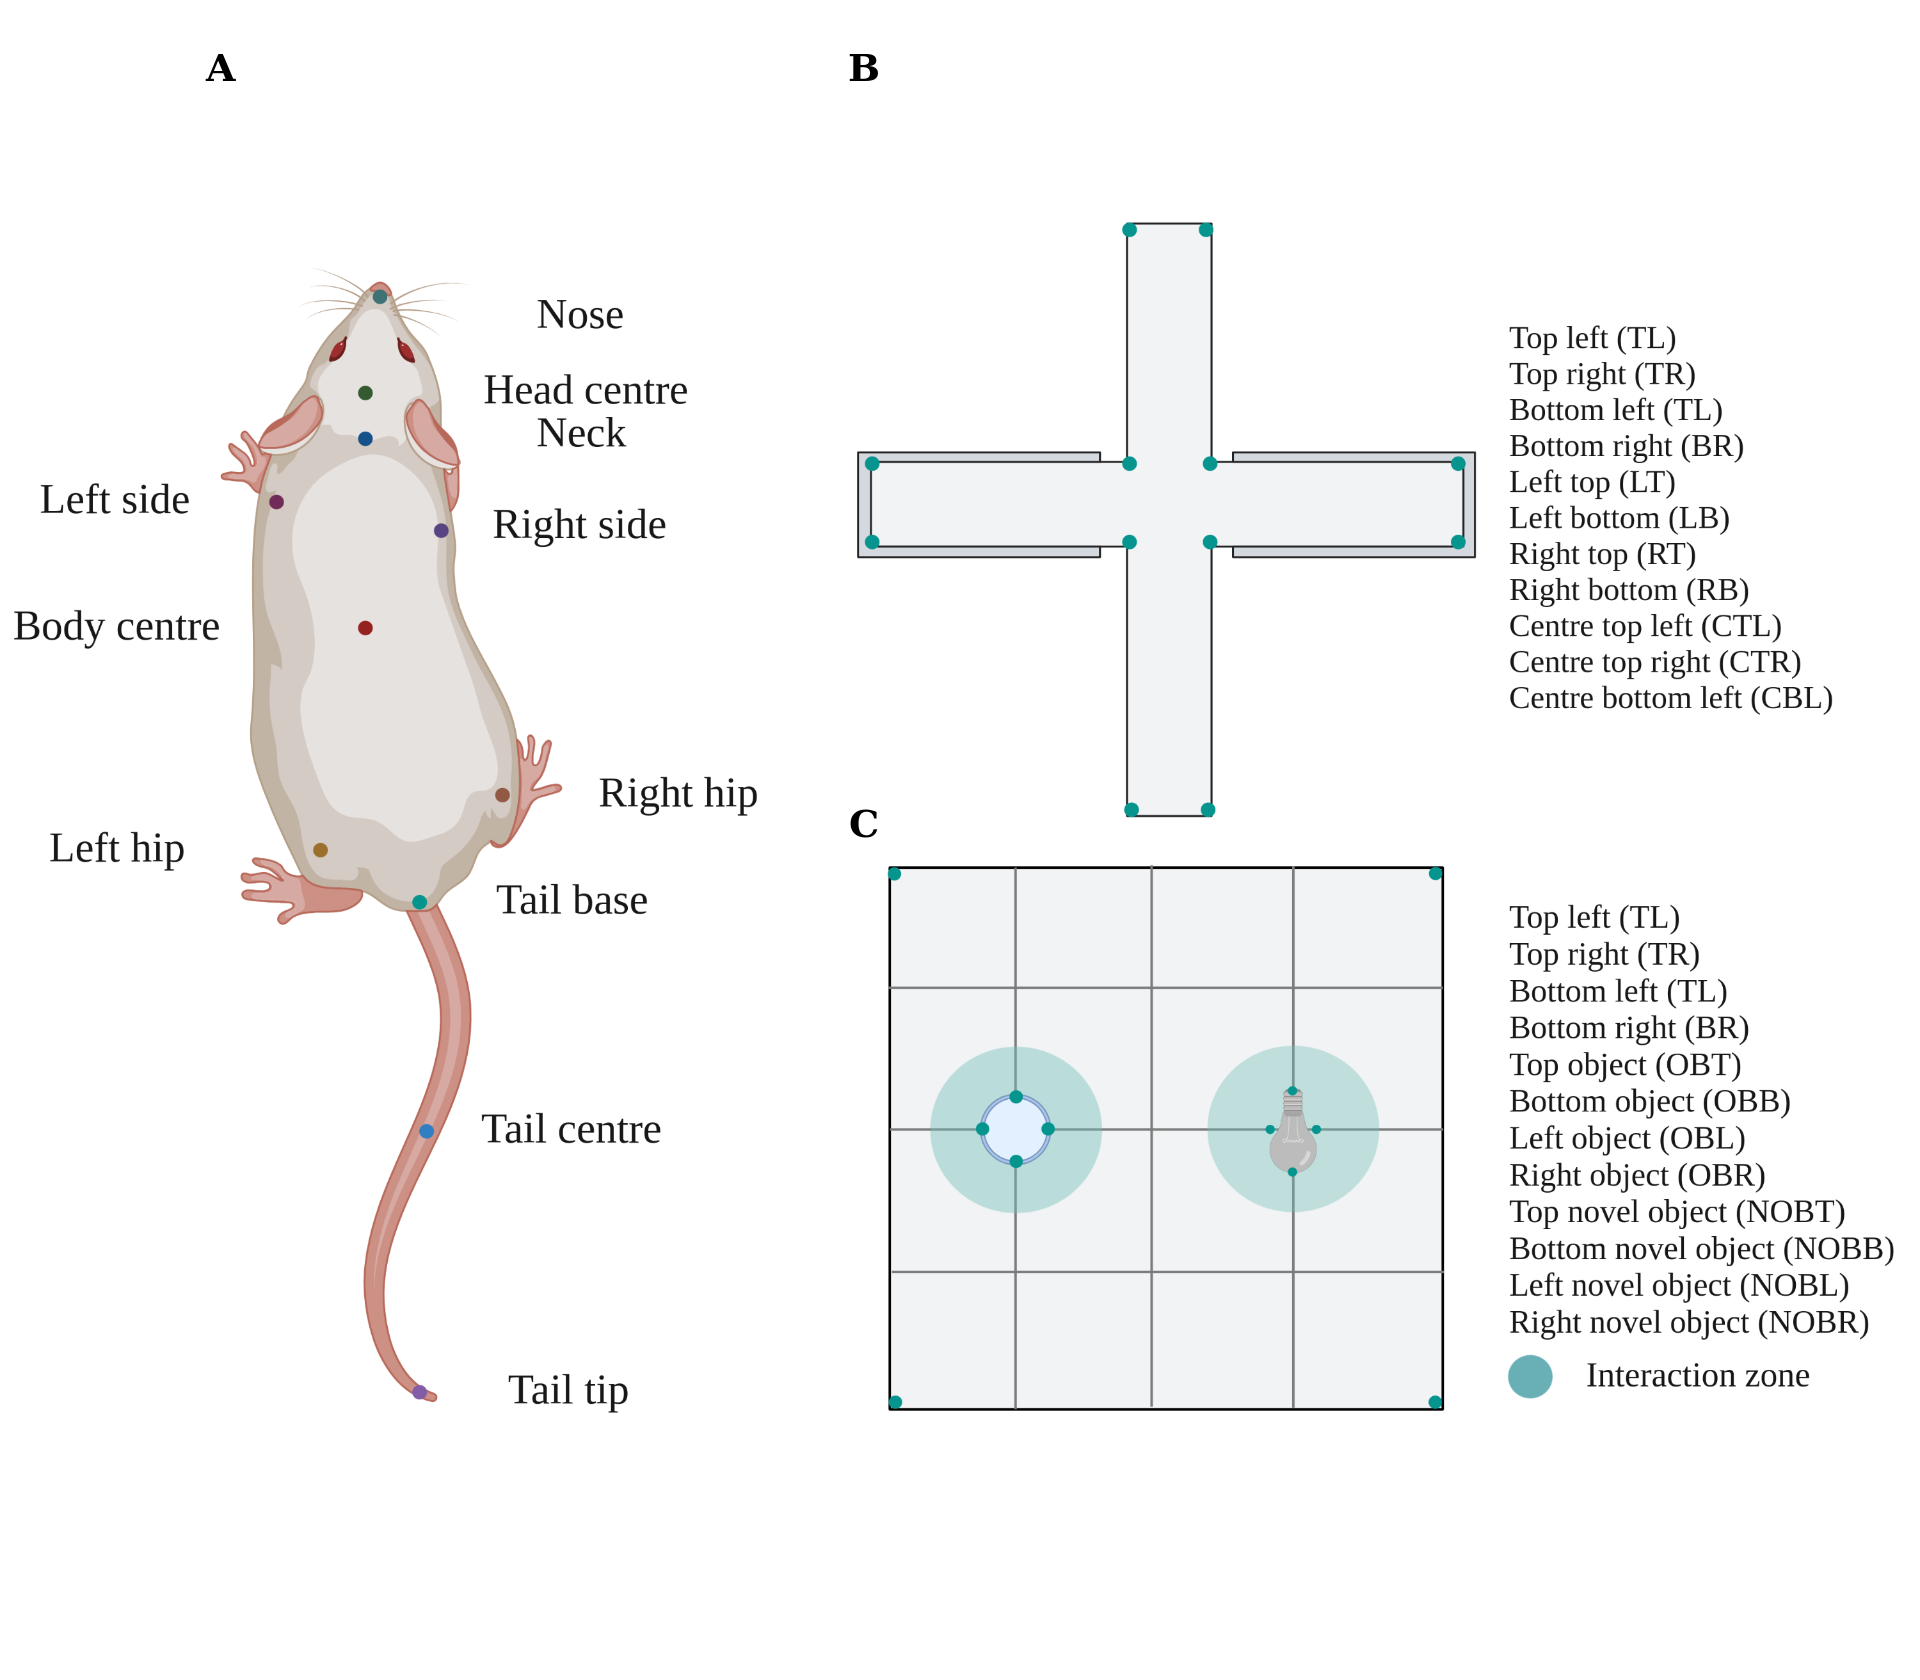

In [27]:
Fig.DLC <- ggarrange(rasterGrob(img)) +
    annotate(geom = "text", x = 0.115, y = 0.96,label = "A", size = 8, fontface = 2, family = "Times New Roman") +
    annotate(geom = "text", x = 0.45, y = 0.51,label = "C", size = 8, fontface = 2, family = "Times New Roman") +
    annotate(geom = "text", x = 0.45, y = 0.96,label = "B", size = 8, fontface = 2, family = "Times New Roman")
Fig.DLC

In [28]:
EPM <- EPM_AI %>% select(RID,Group,class,Sex,Stage,Anxiety_index)
NOR <- NOR_II %>% select(RID,PI) %>% rename("Preference_index" = "PI")
CPP_PI <- CPP %>% filter(Time == "Test") %>% select(RID,Group,class,Sex,Stage,PI) %>% rename("Preference_index_CPP" = "PI")

Behav <- EPM %>% left_join(NOR, by = "RID") %>% left_join(CPP_PI)

Joining with `by = join_by(RID, Group, class, Sex, Stage)`


In [29]:
BehaviorT1 <- Behav %>% filter(Stage == "T1") %>% select(-c(Preference_index)) %>%
    pivot_longer(c(Anxiety_index,Preference_index_CPP),names_to = "Behavior",values_to = "Behavior Score") %>%
    mutate(Behavior = factor(Behavior))

In [30]:
Behavior <- Behav %>% filter(Stage == "T2") %>%
    pivot_longer(c(Anxiety_index,Preference_index,Preference_index_CPP),names_to = "Behavior",values_to = "Behavior Score") %>%
    mutate(Behavior = factor(Behavior))

In [31]:
Behavior1 = BehaviorT1 %>% mutate(Behavior_sex = case_when(Behavior == "Anxiety_index" & Sex == "female" ~ "Anxiety_index_fem",
                                Behavior == "Anxiety_index" & Sex == "male" ~ "Anxiety_index_male",
                                Behavior == "Preference_index" & Sex == "female" ~ "Preference_index_fem",
                                Behavior == "Preference_index" & Sex == "male" ~ "Preference_index_male",
                                Behavior == "Preference_index_CPP" & Sex == "female" ~ "Preference_index_CPP_fem",
                                Behavior == "Preference_index_CPP" & Sex == "male" ~ "Preference_index_CPP_male"), .before = 7) %>%
            mutate(Behavior_sex = factor(Behavior_sex)) %>% mutate(class = factor(class, levels = c("Ctrl","High","Low")))

In [32]:
Behavior2 = Behavior %>% mutate(Behavior_sex = case_when(Behavior == "Anxiety_index" & Sex == "female" ~ "Anxiety_index_fem",
                                Behavior == "Anxiety_index" & Sex == "male" ~ "Anxiety_index_male",
                                Behavior == "Preference_index" & Sex == "female" ~ "Preference_index_fem",
                                Behavior == "Preference_index" & Sex == "male" ~ "Preference_index_male",
                                Behavior == "Preference_index_CPP" & Sex == "female" ~ "Preference_index_CPP_fem",
                                Behavior == "Preference_index_CPP" & Sex == "male" ~ "Preference_index_CPP_male"), .before = 7) %>%
            mutate(Behavior_sex = factor(Behavior_sex)) %>% mutate(class = factor(class, levels = c("Ctrl","High","Low")))

In [33]:
Fig.Behavior1 <- ggboxplot(Behavior1, x = "Behavior_sex", y = "Behavior Score",
          fill = "class", width = 0.5,
          #add = "dotplot", 
          color = "black",
          rotate = TRUE,
          palette = pal_group,
          legend.title = "Group ",
          ggtheme = theme_pubr() ) +
    annotate("text",x=3.5,y=-0.13,label="CPP\nPreferency\nIndex", size = 6, family = "Times New Roman") +
    annotate("text",x=1.5,y=-0.13,label="Anxiety\nIndex", size = 6, family = "Times New Roman") + 
    coord_flip(clip = "off") +
    annotate("segment", x = 0.4, xend = 4.55, y = -0.05, yend = -0.05, colour = "black", linetype=1) +
    annotate("segment", x = 0.4, xend = 0.4, y = -0.05, yend = 1.02, colour = "black", linetype=1) +#
    annotate("segment", x = 1.5, xend = 1.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 3.5, xend = 3.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 3.5, xend = 3.5, y = 0, yend = 1, colour = "gray", linetype=2) +
    annotate("segment", x = 2.5, xend = 2.5, y = 0, yend = 1, colour = "black", linetype=2) +
    annotate("segment", x = 1.5, xend = 1.5, y = 0, yend = 1, colour = "gray", linetype=2) + 
    annotate("rect", xmin=c(0.6), xmax=c(1.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(1.6), xmax=c(2.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + 
    annotate("rect", xmin=c(2.6), xmax=c(3.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(3.6), xmax=c(4.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + 
    annotate(geom = "text", x = 1, y = 1.025,label = "Female", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 2, y = 1.025,label = "Male", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 3, y = 1.025,label = "Female", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 4, y = 1.025,label = "Male", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate("segment", x = 1.25, xend = 2.25, y = 0.91, yend = 0.91, colour = "black", linetype=1) +
#    annotate("segment", x = 0.75, xend = 1.0, y = 0.88, yend = 0.88, colour = "black", linetype=1) +
#    annotate("segment", x = 1.0, xend = 1.25, y = 0.85, yend = 0.85, colour = "black", linetype=1) +
#    annotate(geom = "text", x = 1.75, y = 0.92,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 0.875, y = 0.89,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.125, y = 0.86,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    #geom_hline(yintercept=0.5, linetype="dashed", color = "red") + 
    annotate("segment", x = 2.5, xend = 4.5, y = 0.5, yend = 0.5, colour = "red", linetype=2, alpha=0.5) + 
    theme(axis.title.y = element_blank(), text = element_text(size=20, family = "Times New Roman"), 
          legend.text = element_text(size=20, family = "Times New Roman"),legend.title=element_blank(),
          #legend.background = element_rect(size=0.5, linetype="solid", colour ="black"),
          axis.text.y = element_blank(), axis.line.y = element_blank(), axis.ticks.y = element_blank(),
          axis.line.x = element_blank(), axis.text.x = element_text(margin = margin(c(t = .25), unit = "cm")) )

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


In [34]:
Fig.Behavior <- ggboxplot(Behavior2, x = "Behavior_sex", y = "Behavior Score",
          fill = "class", width = 0.5,
          #add = "dotplot", 
          color = "black",
          rotate = TRUE,
          palette = pal_group,
          legend.title = "Group ",
          ggtheme = theme_pubr() ) +
    annotate("text",x=5.5,y=-0.13,label="NOR\nPreferency\nIndex", size = 6, family = "Times New Roman") +
    annotate("text",x=3.5,y=-0.13,label="CPP\nPreferency\nIndex", size = 6, family = "Times New Roman") +
    annotate("text",x=1.5,y=-0.13,label="Anxiety\nIndex", size = 6, family = "Times New Roman") + 
    coord_flip(clip = "off") +
    annotate("segment", x = 0.4, xend = 4.55, y = -0.05, yend = -0.05, colour = "black", linetype=1) +
    annotate("segment", x = 0.4, xend = 0.4, y = -0.05, yend = 1.02, colour = "black", linetype=1) +#
    annotate("segment", x = 1.5, xend = 1.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 3.5, xend = 3.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 4.5, xend = 6.5, y = -0.05, yend = -0.05, colour = "black", linetype=1) + #CPP
    annotate("segment", x = 5.5, xend = 5.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) + #CPP
    annotate("segment", x = 3.5, xend = 3.5, y = 0, yend = 1, colour = "gray", linetype=2) +
    annotate("segment", x = 2.5, xend = 2.5, y = 0, yend = 1, colour = "black", linetype=2) +
    annotate("segment", x = 1.5, xend = 1.5, y = 0, yend = 1, colour = "gray", linetype=2) + 
    annotate("segment", x = 4.5, xend = 4.5, y = 0, yend = 1, colour = "black", linetype=2) + #CPP
    annotate("segment", x = 5.5, xend = 5.5, y = 0, yend = 1, colour = "gray", linetype=2) + #CPP
    annotate("rect", xmin=c(0.6), xmax=c(1.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(1.6), xmax=c(2.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + 
    annotate("rect", xmin=c(2.6), xmax=c(3.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(3.6), xmax=c(4.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + 
    annotate("rect", xmin=c(4.6), xmax=c(5.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + #CPP
    annotate("rect", xmin=c(5.6), xmax=c(6.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + #CPP
    annotate(geom = "text", x = 1, y = 1.025,label = "Female", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 2, y = 1.025,label = "Male", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 3, y = 1.025,label = "Female", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 4, y = 1.025,label = "Male", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 5, y = 1.025,label = "Female", size = 6, fontface = 2, angle = 270, family = "Times New Roman") + #CPP
    annotate(geom = "text", x = 6, y = 1.025,label = "Male", size = 6, fontface = 2, angle = 270, family = "Times New Roman") + #CPP
#    annotate("segment", x = 0.75, xend = 2.3, y = 0.97, yend = 0.97, colour = "black", linetype=1) +
#    annotate("segment", x = 0.75, xend = 2.0, y = 0.94, yend = 0.94, colour = "black", linetype=1) +
#    annotate("segment", x = 0.75, xend = 1.75, y = 0.91, yend = 0.91, colour = "black", linetype=1) +
#    annotate("segment", x = 1.0, xend = 2.0, y = 0.88, yend = 0.88, colour = "black", linetype=1) +
#    annotate("segment", x = 1.25, xend = 2.0, y = 0.85, yend = 0.85, colour = "black", linetype=1) +
#    annotate("segment", x = 1.25, xend = 1.75, y = 0.82, yend = 0.82, colour = "black", linetype=1) +
#    annotate(geom = "text", x = 1.55, y = 0.98,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.4, y = 0.95,label = "**", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.25, y = 0.92,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.5, y = 0.89,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.625, y = 0.86,label = "**", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.5, y = 0.83,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    #geom_hline(yintercept=0.5, linetype="dashed", color = "red") + 
    annotate("segment", x = 2.5, xend = 6.5, y = 0.5, yend = 0.5, colour = "red", linetype=2, alpha=0.5) + 
    theme(axis.title.y = element_blank(), text = element_text(size=20, family = "Times New Roman"), 
          legend.text = element_text(size=20, family = "Times New Roman"),legend.title=element_blank(),
          #legend.background = element_rect(size=0.5, linetype="solid", colour ="black"),
          axis.text.y = element_blank(), axis.line.y = element_blank(), axis.ticks.y = element_blank(),
          axis.line.x = element_blank(), axis.text.x = element_text(margin = margin(c(t = .25), unit = "cm")) )

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


In [17]:
seeds <- readPNG("Figures/fMRI/Seeds.png")

In [ ]:
Fig.seeds1 <- ggarrange(rasterGrob(seeds),geom_blank(), ncol =2,nrow = 1,weights = c(1.5,0.5,0.5)) %>% .[[1]]
Fig.seeds <- ggarrange(Fig.seeds1,geom_blank(),geom_blank(), ncol =1,heights = c(1.2,0.8,1))

In [35]:
Fig.Beh_AC <- ggarrange(Fig.DLC,Fig.Behavior1, ncol = 1, 
          font.label=list(color="black",size=22,face="bold", family = "Times New Roman"),
          heights = c(1.1,0.9))

In [36]:
Fig.Beh_BD <- ggarrange(Fig.Behavior1,Fig.Behavior, ncol = 2, 
          font.label=list(color="black",size=22,face="bold", family = "Times New Roman"),
          labels = c("D","E"))

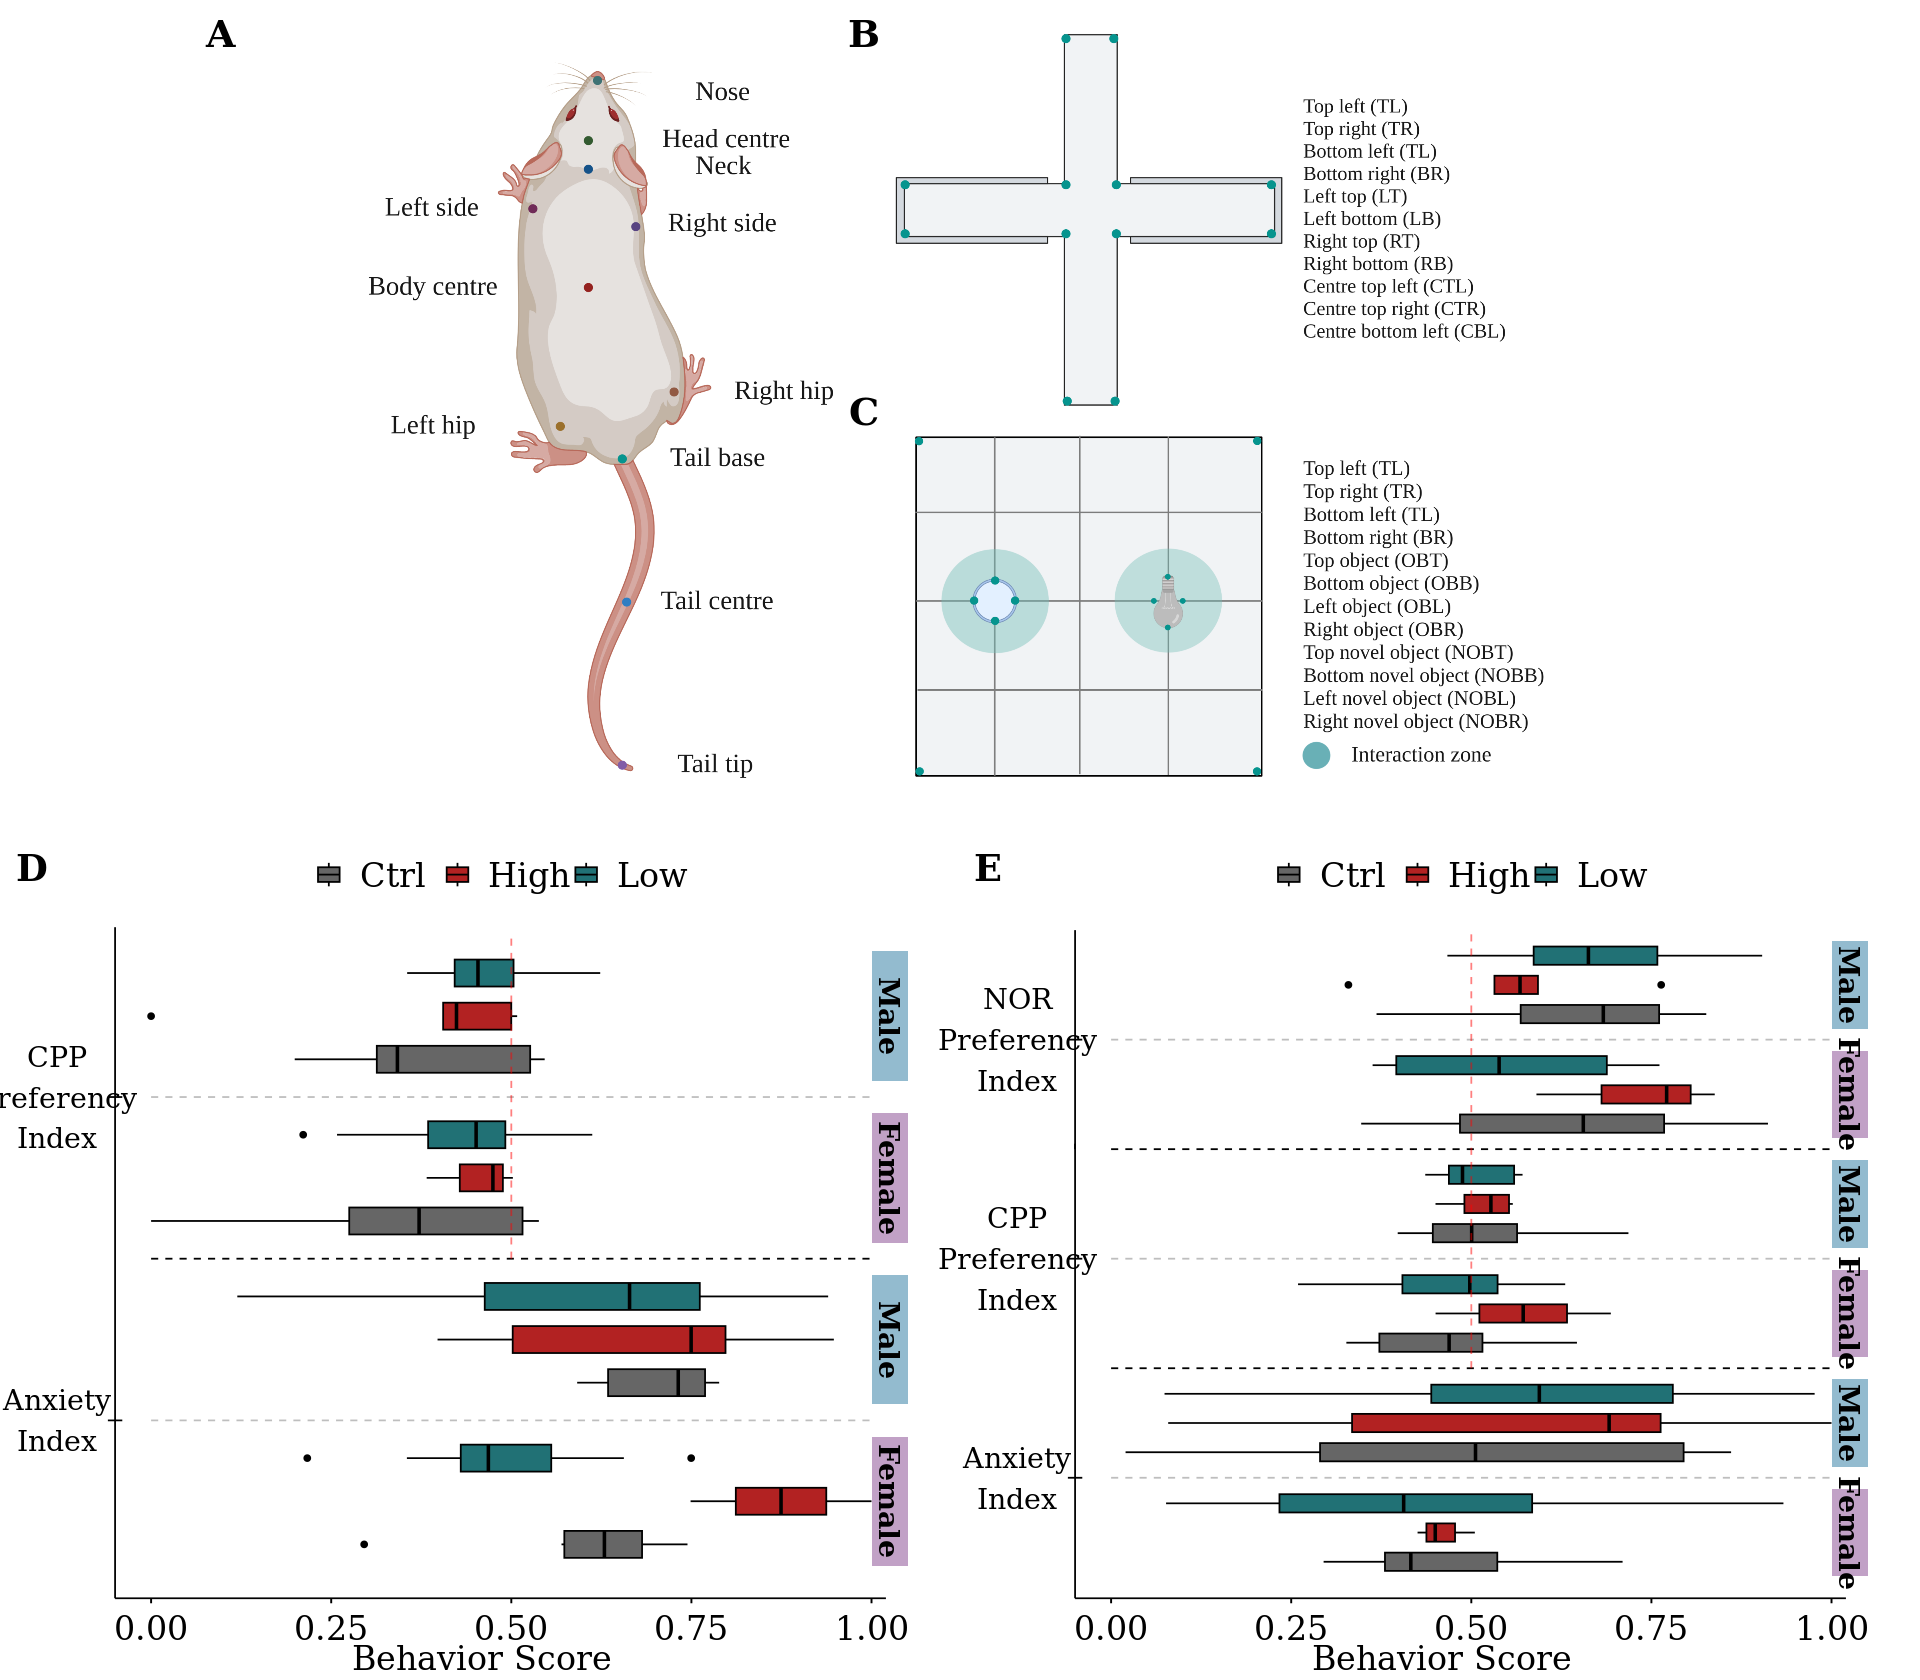

In [37]:
Fig.Beh <- ggarrange(Fig.DLC,Fig.Beh_BD,ncol = 1, nrow = 2)
Fig.Beh

## **MRI figures**

In [73]:
sig.names <- names(Model4_plots) %>% map(~ list.files("Figures/DBM/slices/png", pattern = .x, full.names = T) )
slice_MRI <- sig.names %>% map(~ readPNG(.x,native = TRUE) ) %>% set_names(sig.names %>% map(~ .x %>% basename() ))

In [80]:
#paste0("Mod4-",slice_MRI[[1]],"_High.png")
names(Model4_plots)

[1] "right_olfactory_bulb_Pmod4H_peaks"                          
[2] "left_pre_limbic_system_left_Pmod4H_peaks"                   
[3] "right_granule_cell_level_of_the_cerebellum_Pmod4H_peaks"    
[4] "left_granule_cell_level_of_the_cerebellum_left_Pmod4L_peaks"

In [83]:
ggp_image <- Model4_plots_blank$left_pre_limbic_system_left_Pmod4H_peaks +                  # Combine plot & image
  inset_element(p = slice_MRI$`Mod4-left_pre_limbic_system_left_Pmod4H_peaks_Poly_High.png`,
                left = 0.7,
                bottom = 0.65,
                right = 0.95,
                top = 0.85)

In [66]:
Model4_plots_blank <- names(Model4_plots) %>% map(~ ggarrange(Model4_plots[[.x]],geom_blank(), ncol =2,nrow = 1,widths = c(1.75,0.3)) ) %>%
    set_names(names(Model4_plots))

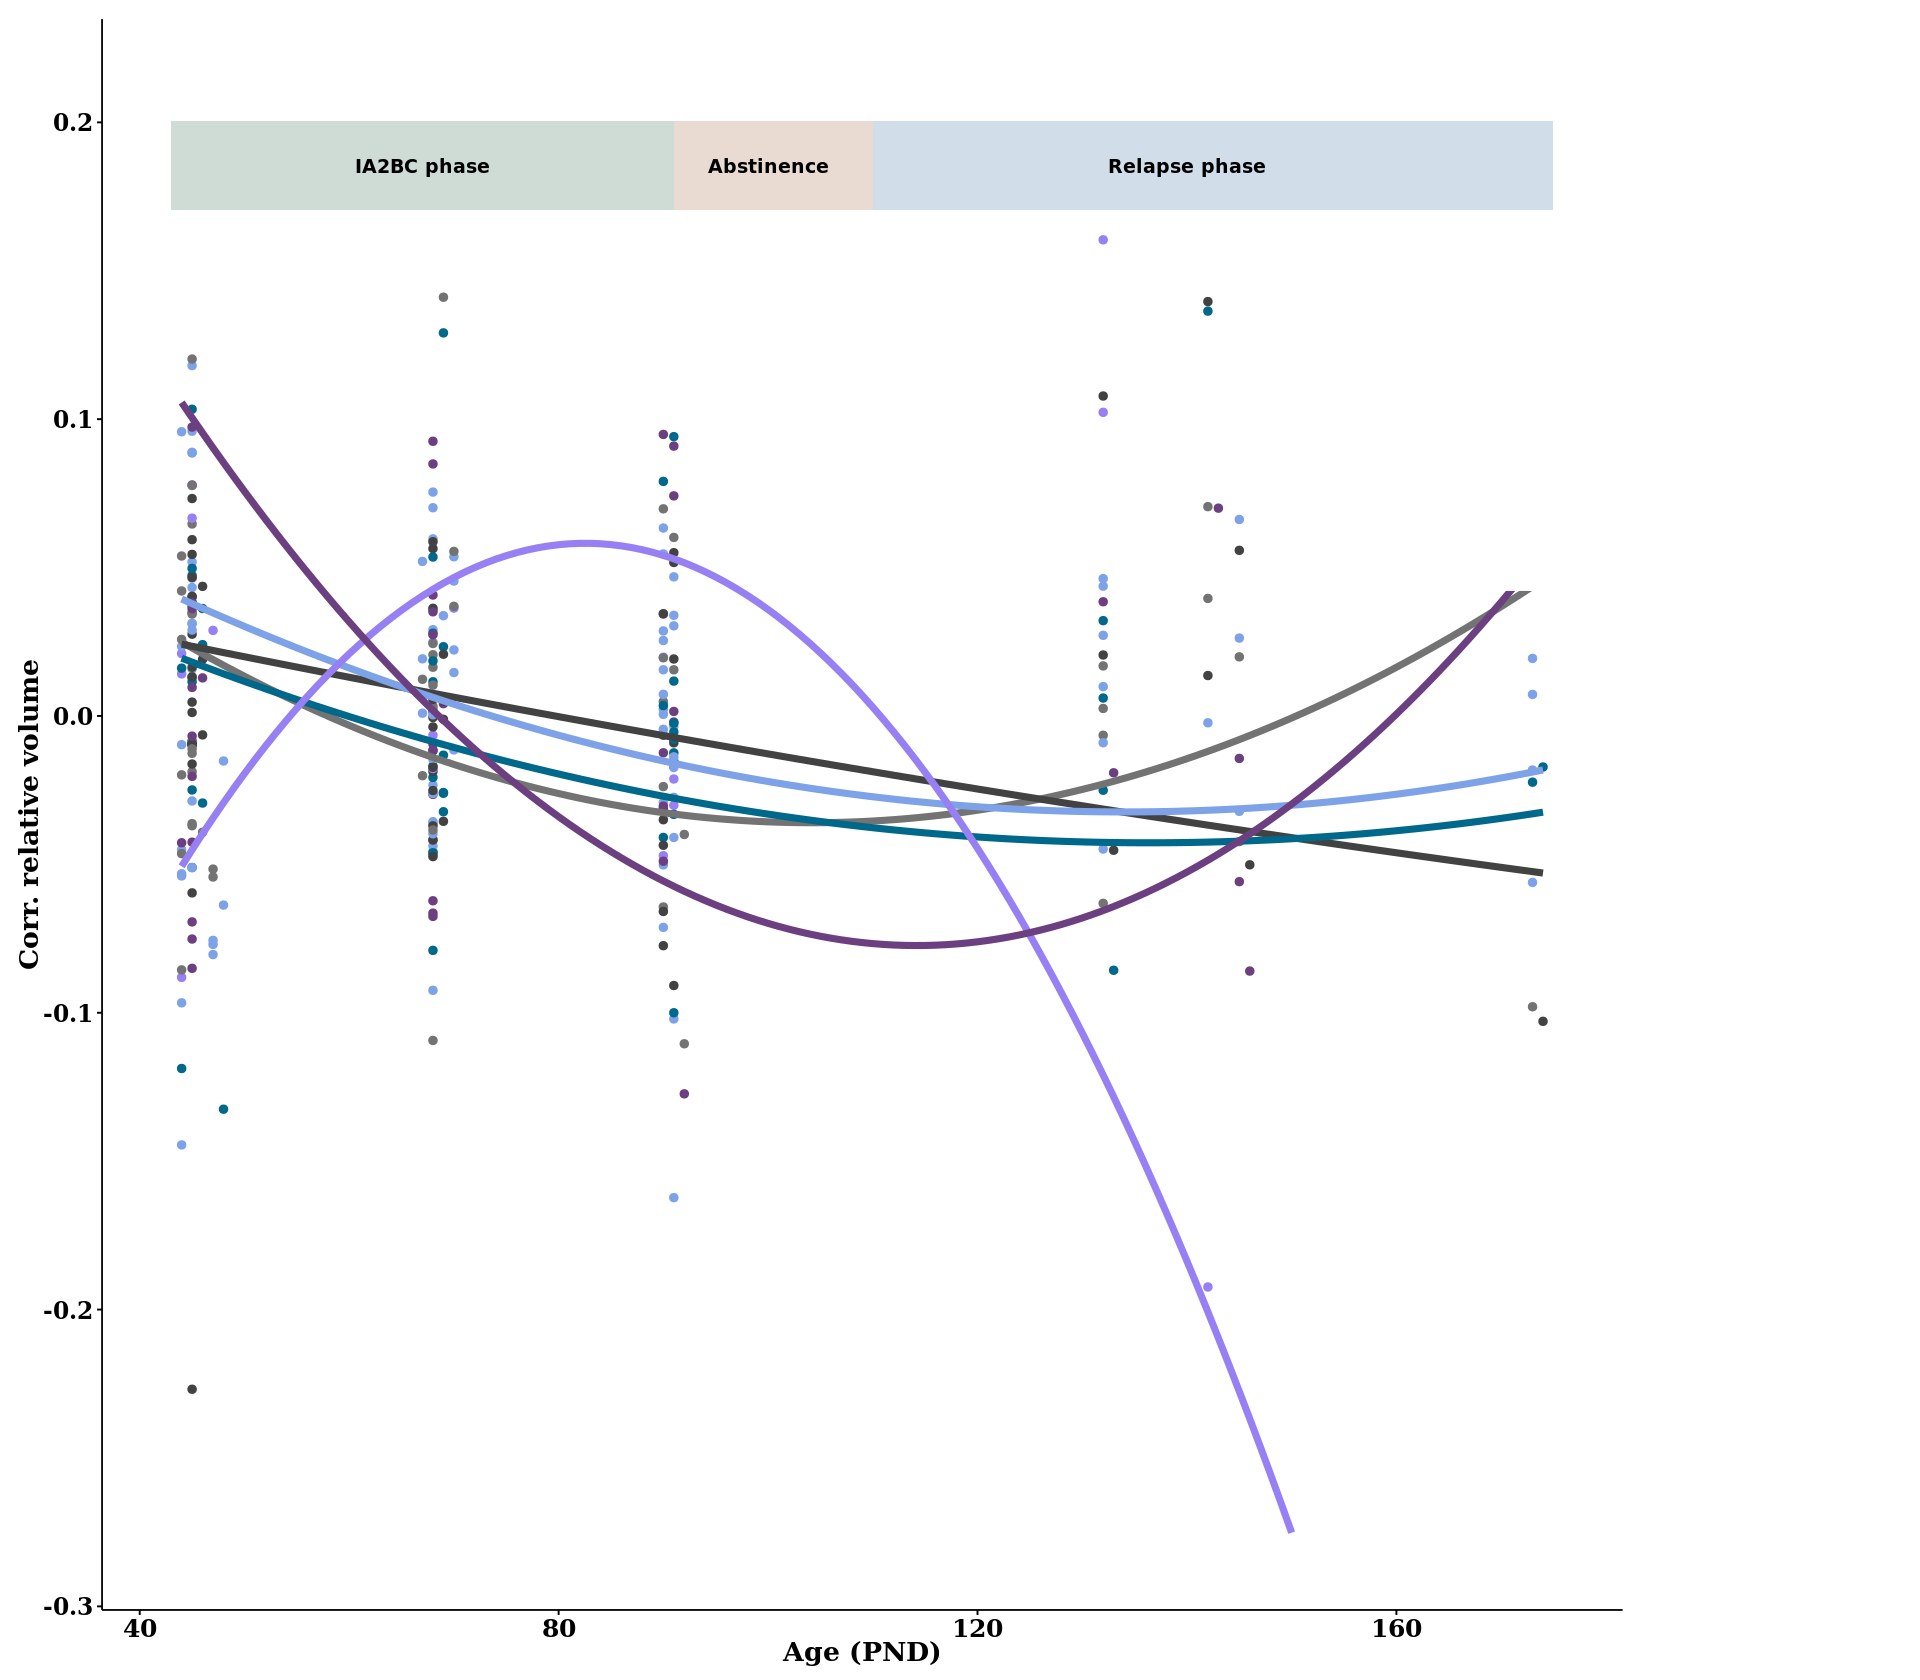

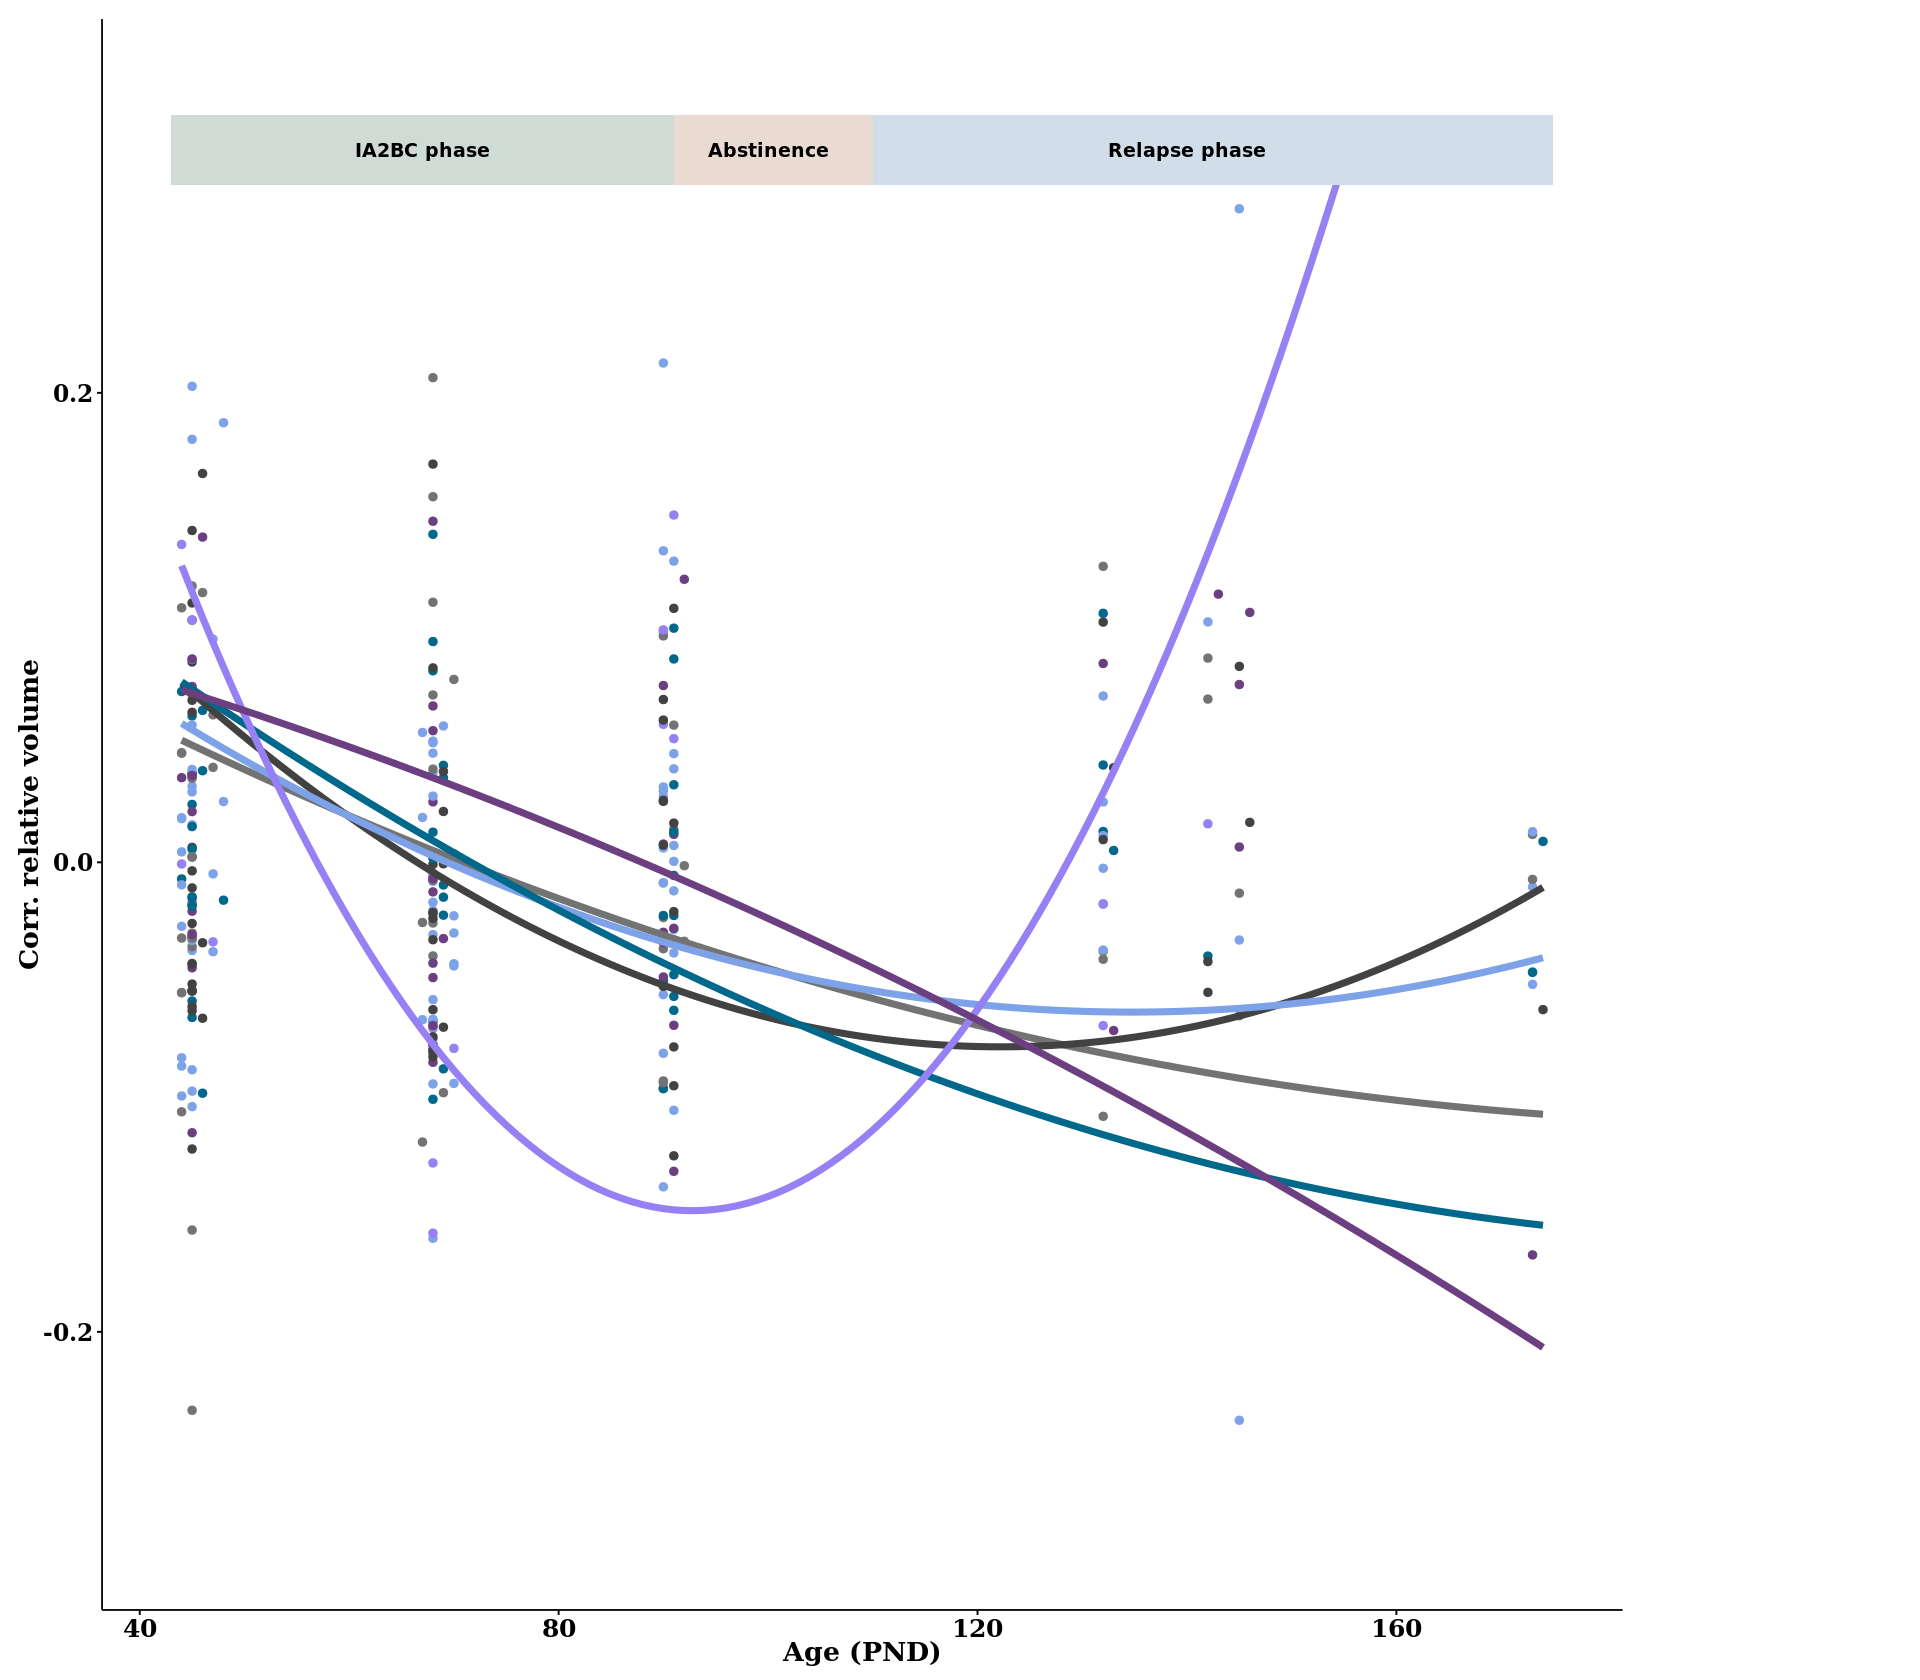

[[1]]

[[2]]

[[3]]

[[4]]


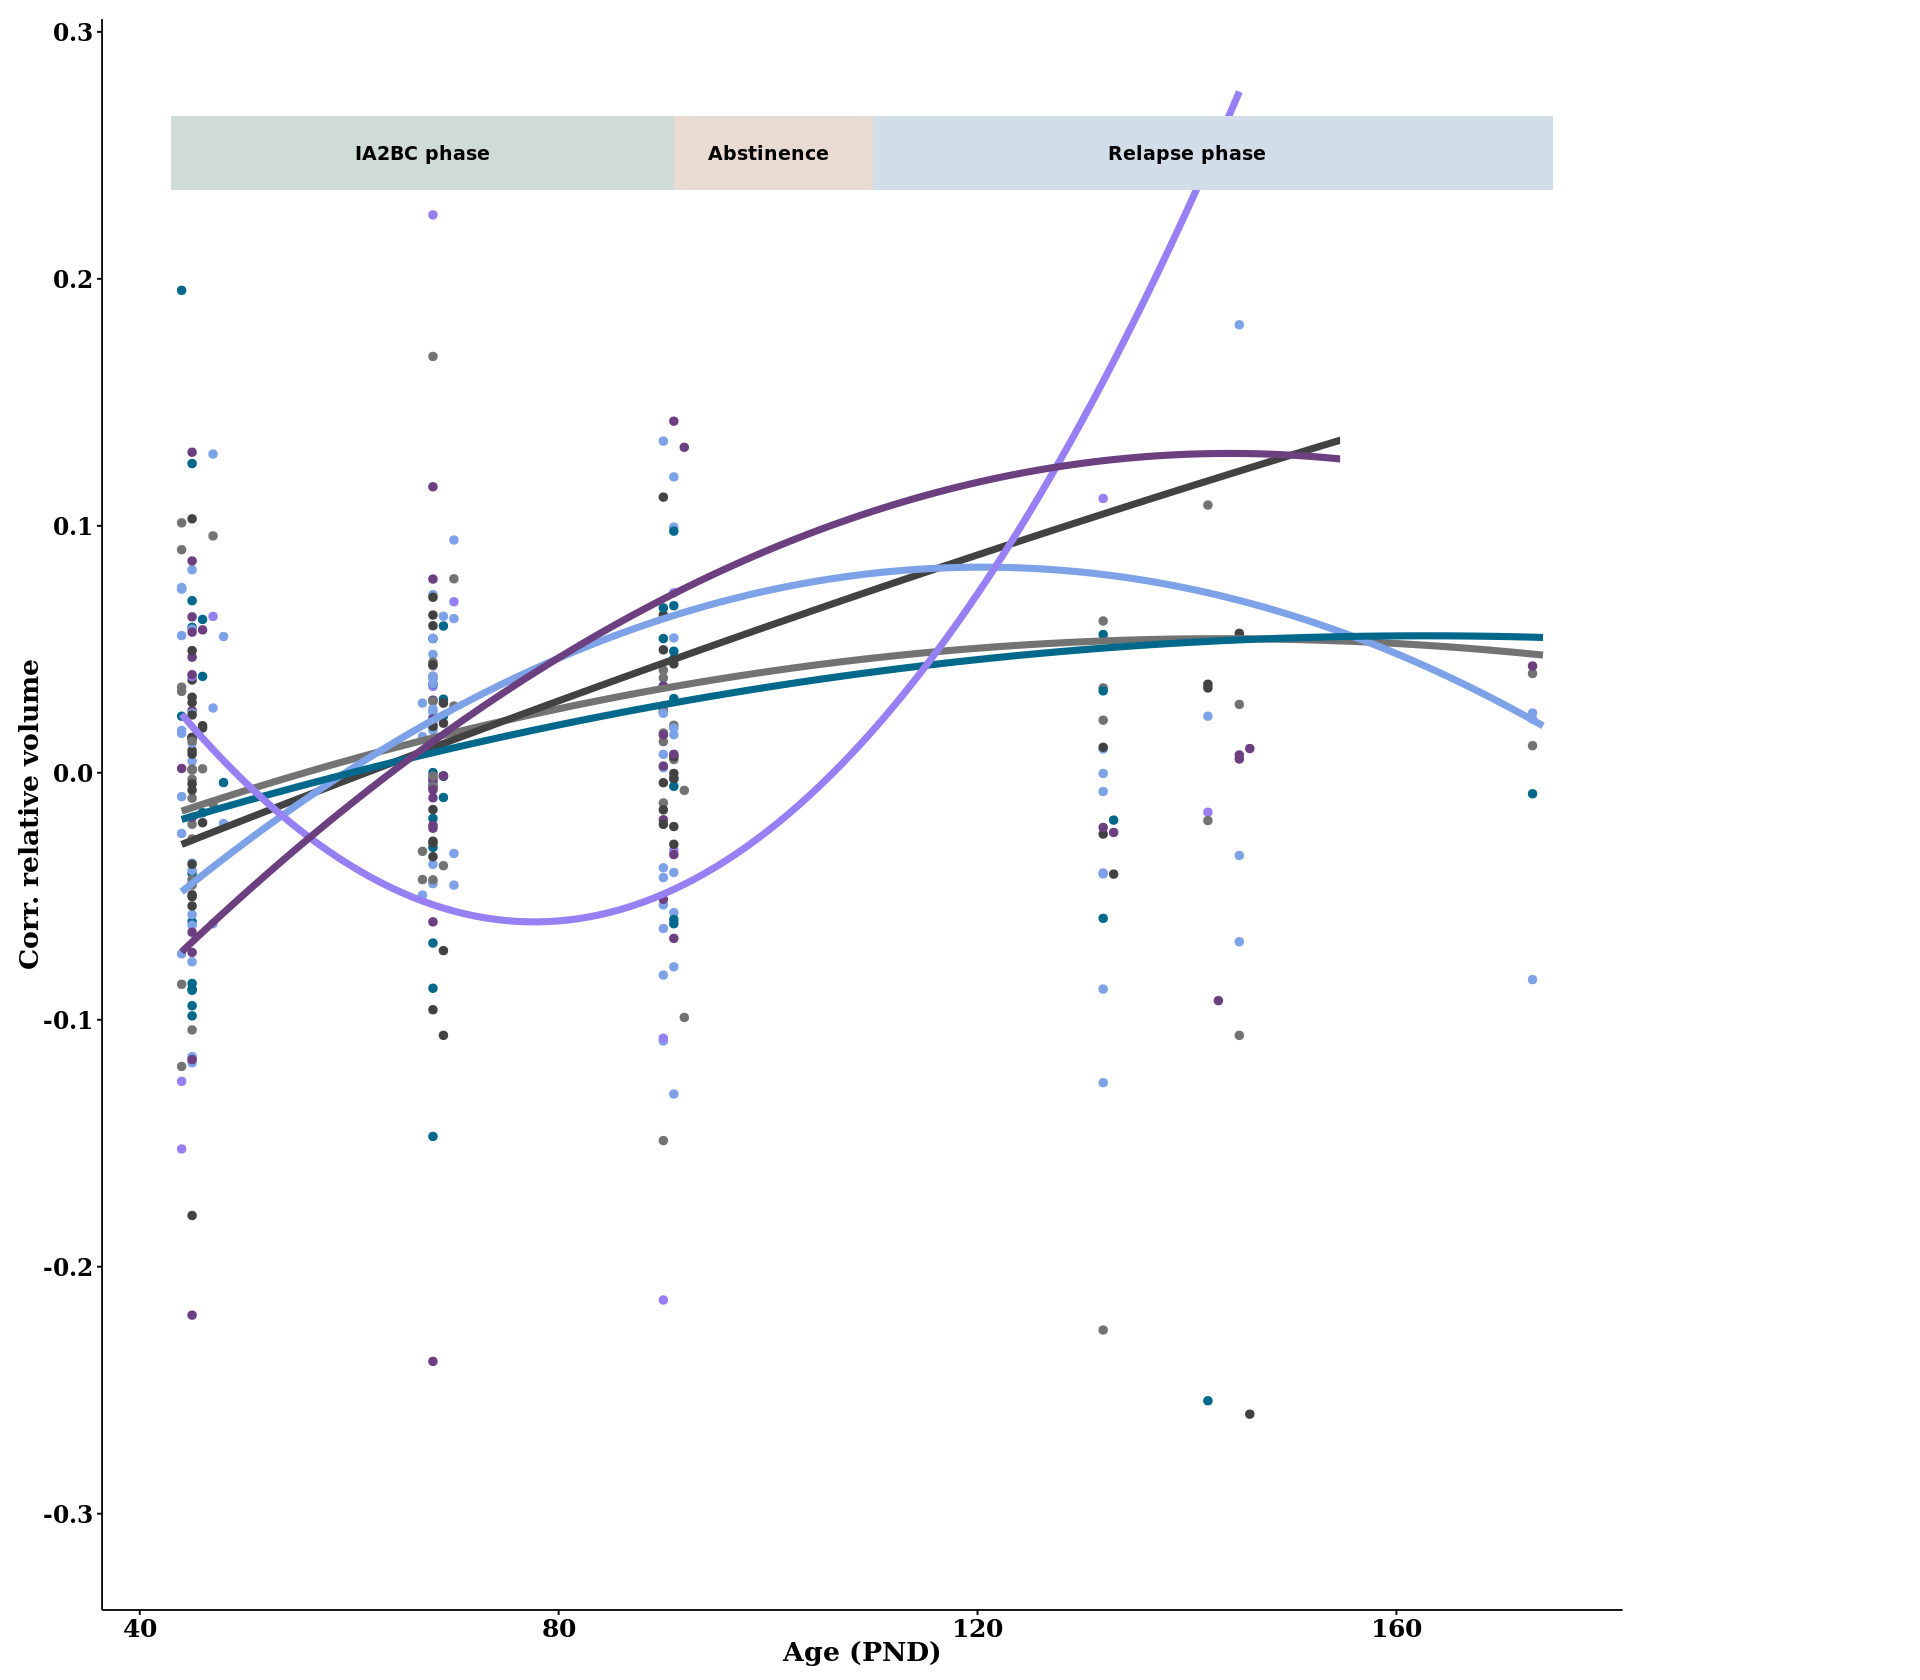

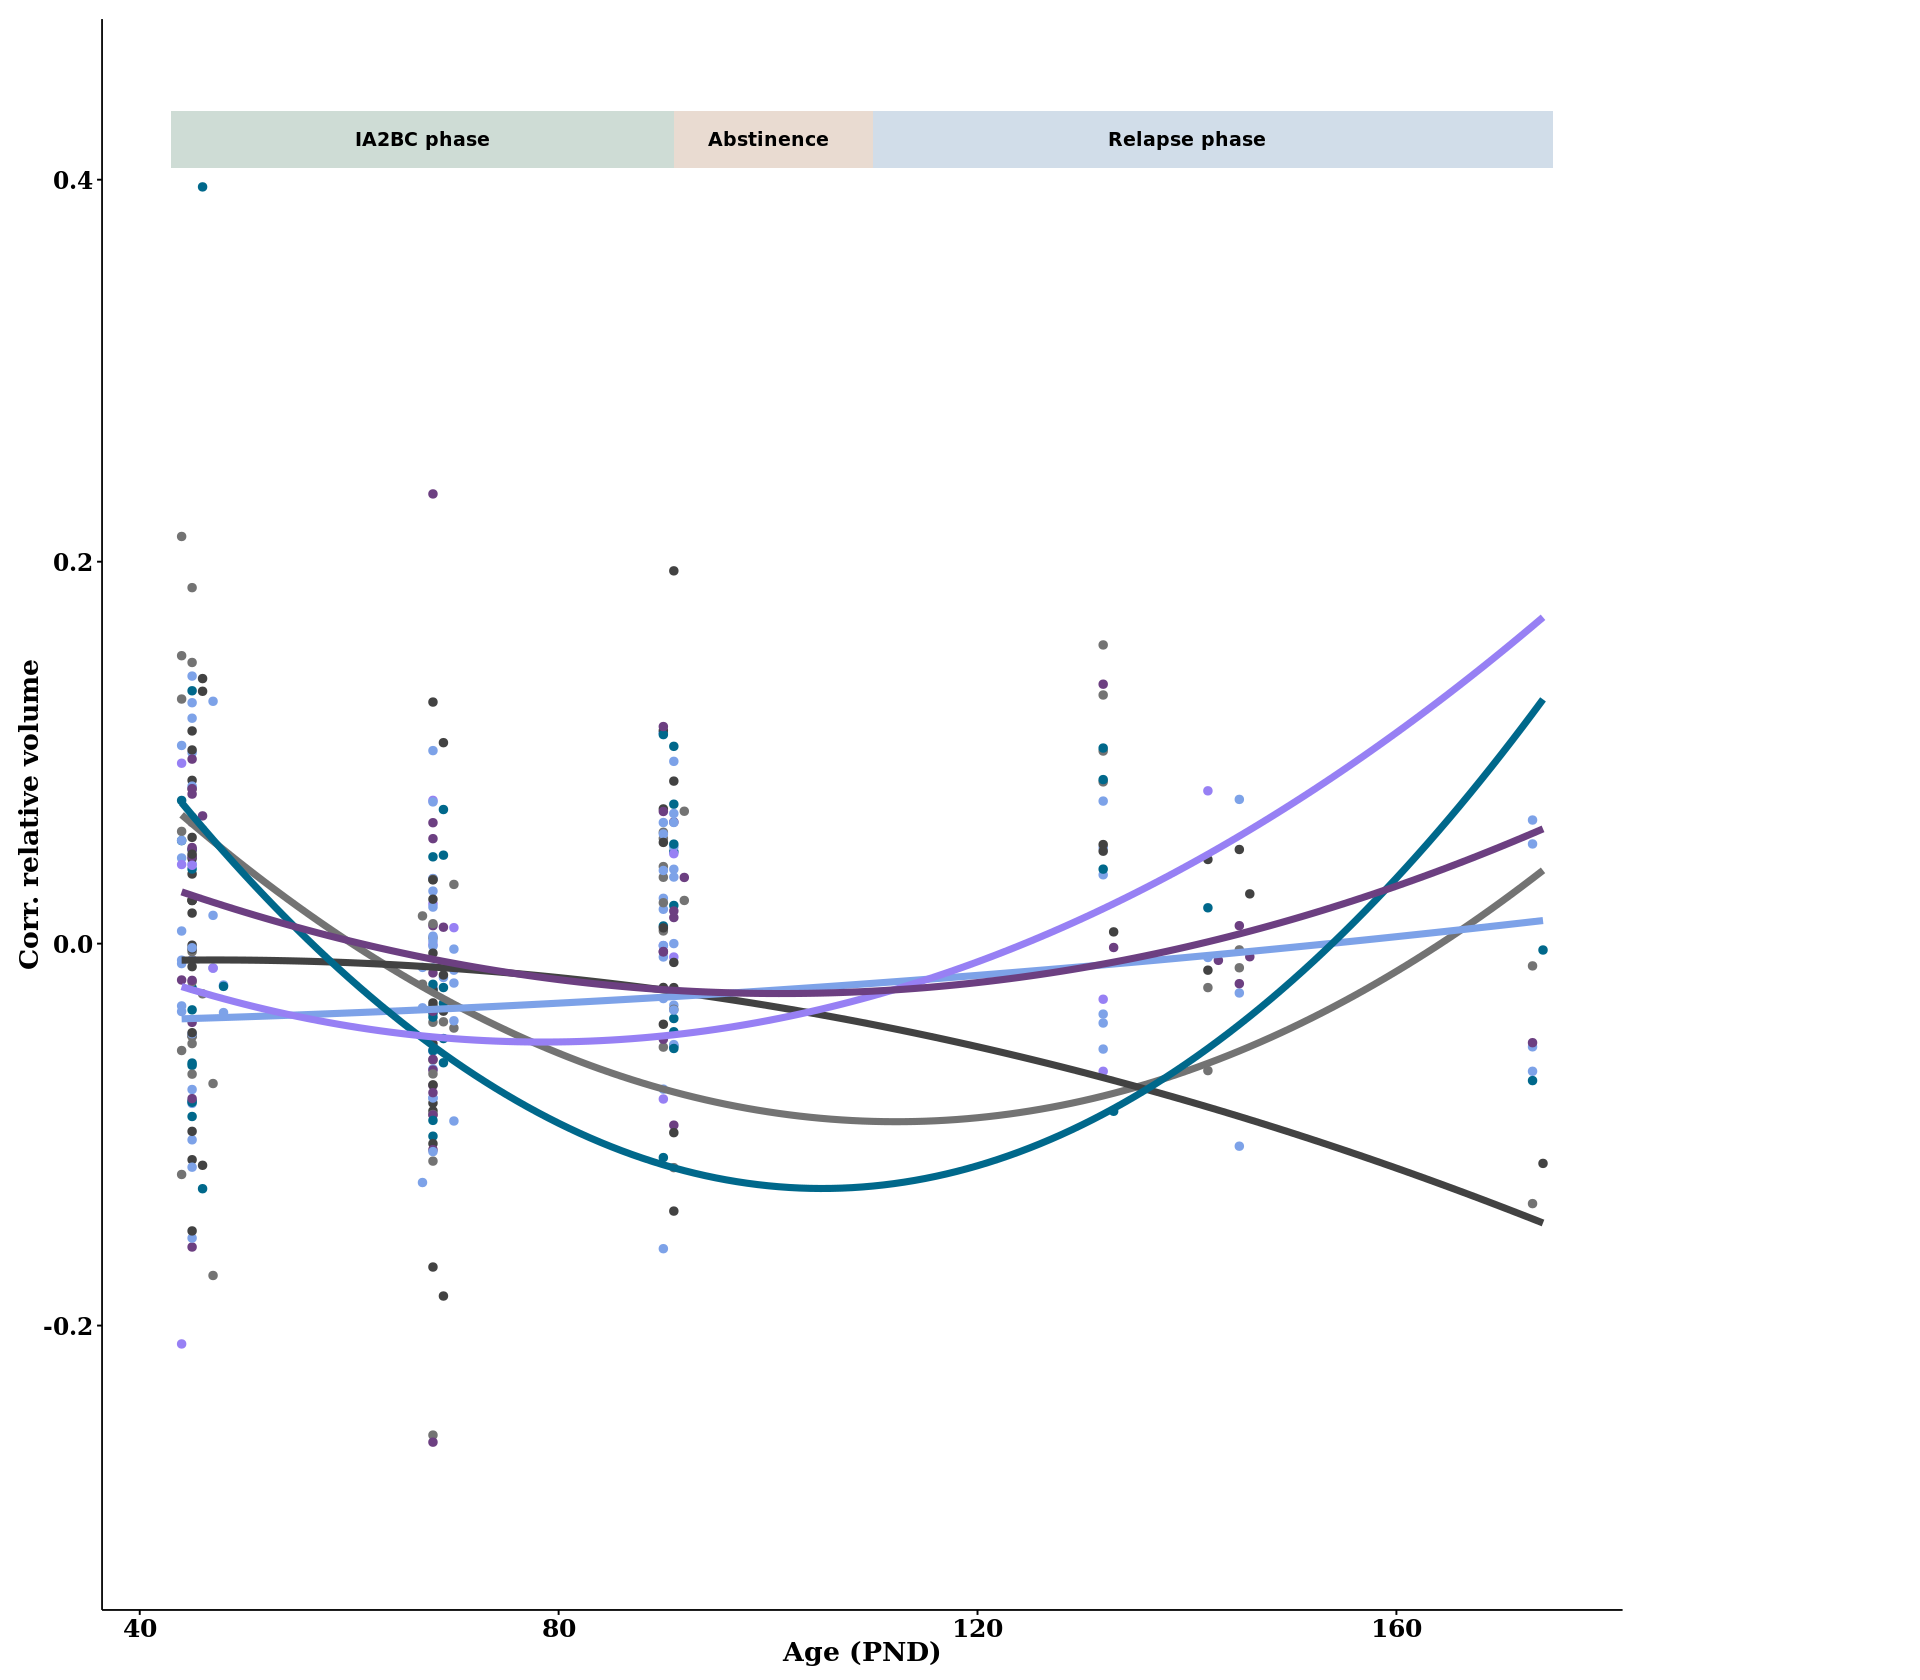

In [84]:
names(Model4_plots)  %>% map(~ Model4_plots_blank[[.x]] + inset_element(p = slice_MRI[[paste0("Mod4-",.x,"Poly_High.png")]], left = 0.7, bottom = 0.65, right = 0.95, top = 0.85) )

In [45]:
dir.create("Figures/DBM/Trayectories_slices/",recursive = T,showWarnings = F)

In [140]:
ggsave(plot = ggp_image, dpi=300,height = 7, width = 9,bg="white",
       filename = "Figures/DBM/Trayectories_slices/borrar.png")

## **Export Figures**

In [38]:
dir.create("Figures/Final_Figures")

In [39]:
ggsave(plot = Fig.Behavior, dpi=300,height = 9, width = 9,bg="white",
       filename = "Figures/DLC/DLC_Results.png")

In [ ]:
ggsave(plot = Fig.Design, dpi=300,height = 11, width = 15,bg="white",
       filename = "Figures/Final_Figures/Fig_Design.png")

In [49]:
ggsave(plot = Fig.Consumption, dpi=300,height = 14.5, width = 19,bg="white",
       filename = "Figures/Final_Figures/Fig_Consumption.png")

In [42]:
ggsave(plot = Fig.DLC, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/Final_Figures/Fig_DLC_lab.png")

In [45]:
ggsave(plot = Fig.Beh, dpi=300,height = 16, width = 17,bg="white",
       filename = "Figures/Final_Figures/Fig_Beh.png")